In [1]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
import time

In [2]:
import FisherPlot
import tooFab

In [3]:
#My own color table
my_cmap = FisherPlot.cmap
#Matplotlib's default cycle of colors
t10_cmap = plt.get_cmap("tab10")

<h4>Some strings for filenames</h4>

In [11]:
uuid          = '2cdfb740-27c9-4e91-bec4-ef0f6b4835ad'
datfileprefix = '../Output/'+uuid
plotprefix    = uuid
fsky_Euclid   = 0.36
sqfsky_Euclid = np.sqrt(fsky_Euclid)

<h1>Read data files</h1>

In [5]:
#filenames
file_Ngal              = datfileprefix+'_EuclidHOD_Ngal.dat'
file_bgal              = datfileprefix+'_EuclidHOD_bgal.dat'

file_Cl                = datfileprefix+'_Clgal.dat'
file_CovCl             = datfileprefix+'_Cov_Clgal.dat'

In [6]:
# Read data files
# HOD, Ngal, bias
#Ngal
dataNgal = np.loadtxt(file_Ngal,dtype='float')
z_Ngal = dataNgal[:,0] ; Ngal_ref = dataNgal[:,1] ; Ngal_hod = dataNgal[:,2]
#bgal
databgal = np.loadtxt(file_bgal,dtype='float')
z_bgal = databgal[:,0] ; b1_gal = databgal[:,1]
b2_gal = databgal[:,2] ; bs2_gal = databgal[:,3]
# Clgal
dataCl = np.loadtxt(file_Cl,dtype='float')
l_Cl = dataCl[:,0] ; z_Cl = dataCl[:,1]
Cl_shot = dataCl[:,2] ; Cl_1h = dataCl[:,3] ; Cl_2h = dataCl[:,4] 
Cl_clust_vec = Cl_2h + Cl_1h
# Covariance(Clgal)
dataCovCl = np.loadtxt(file_CovCl,dtype='float')
l1_CovCl = dataCovCl[:,0] ; z1_CovCl = dataCovCl[:,1]
l2_CovCl = dataCovCl[:,2] ; z2_CovCl = dataCovCl[:,3]
CovCl_G_vec = dataCovCl[:,4] ; CovCl_SSC_vec = dataCovCl[:,5]
CovCl_1h_vec = dataCovCl[:,6] ; CovCl_1hshot3g_vec = dataCovCl[:,7]
CovCl_1hshot2g_vec = dataCovCl[:,8] ; CovCl_1hshot1g_vec = dataCovCl[:,9] #Remarks: shot-noise terms are killed by shot-noise substraction, cf arXiv:1711.07372
CovCl_2h1p3_vec = dataCovCl[:,10] ; CovCl_3hbase0_vec = dataCovCl[:,11]
CovCl_4h3rd_vec = dataCovCl[:,12] ; CovCl_Braid_vec = dataCovCl[:,13]

In [7]:
z = np.unique(z_Cl) ; nz = np.size(z) ; zmin = z.min() ; zmax = 2.5
ell = np.unique(l_Cl) ; nl = np.size(ell) ; lmin = ell.min() ; lmax = 50000

In [8]:
# Recast vectors into arrays
#Cl
Cl_shot_arr       = tooFab.recast2D(l_Cl,z_Cl,Cl_shot)
Cl_1h_arr         = tooFab.recast2D(l_Cl,z_Cl,Cl_1h)
Cl_2h_arr         = tooFab.recast2D(l_Cl,z_Cl,Cl_2h) 
#Cov(Cl)
CovCl_G_arr       = tooFab.recast4D(l1_CovCl,z1_CovCl,l2_CovCl,z2_CovCl,CovCl_G_vec)
CovCl_SSC_arr     = tooFab.recast4D(l1_CovCl,z1_CovCl,l2_CovCl,z2_CovCl,CovCl_SSC_vec)
CovCl_1h_arr      = tooFab.recast4D(l1_CovCl,z1_CovCl,l2_CovCl,z2_CovCl,CovCl_1h_vec)
CovCl_2h1p3_arr   = tooFab.recast4D(l1_CovCl,z1_CovCl,l2_CovCl,z2_CovCl,CovCl_2h1p3_vec)
CovCl_3hbase0_arr = tooFab.recast4D(l1_CovCl,z1_CovCl,l2_CovCl,z2_CovCl,CovCl_3hbase0_vec)
CovCl_4h3rd_arr   = tooFab.recast4D(l1_CovCl,z1_CovCl,l2_CovCl,z2_CovCl,CovCl_4h3rd_vec)
CovCl_Braid_arr   = tooFab.recast4D(l1_CovCl,z1_CovCl,l2_CovCl,z2_CovCl,CovCl_Braid_vec)

In [9]:
# Add up terms
Cl_clust_arr      = Cl_2h_arr + Cl_1h_arr
Cl_tot_arr        = Cl_2h_arr + Cl_1h_arr + Cl_shot_arr
CovCl_ONG_arr     = CovCl_1h_arr + CovCl_2h1p3_arr + CovCl_3hbase0_arr + CovCl_4h3rd_arr + CovCl_Braid_arr
CovCl_tot_arr     = CovCl_G_arr + CovCl_SSC_arr + CovCl_ONG_arr

<h1>Plots of Ngal(z) and bgal(z)</h1>

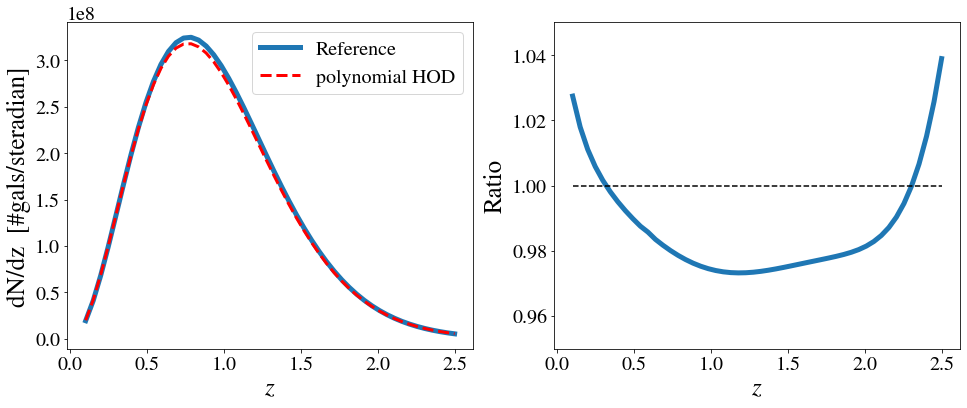

In [12]:
fig = plt.figure(figsize=(16,6))
#Ngal(z)
ax = plt.subplot(1,2,1)
plt.plot(z_Ngal,Ngal_ref,linewidth=5,label='Reference')
plt.plot(z_Ngal,Ngal_hod,linewidth=3,color='red',linestyle='--',label='polynomial HOD')
plt.xlabel(r'$z$',fontsize=25)
plt.ylabel('dN/dz  [#gals/steradian]',fontsize=25)
plt.tick_params(labelsize=20)
ax.yaxis.get_offset_text().set_size(20)
plt.legend(fontsize=20)
#ratio
plt.subplot(1,2,2)
plt.plot(z_Ngal,Ngal_hod/Ngal_ref,linewidth=5,label='Reference / polynomial HOD')
plt.plot(z_Ngal,1+0*z_Ngal,color='black',linestyle='--')
plt.xlabel(r'$z$',fontsize=25)
plt.ylabel('Ratio',fontsize=25)
plt.ylim([0.95,1.05])
plt.tick_params(labelsize=20)
#plt.legend(fontsize=20)
plt.savefig(plotprefix+"_comp_Ngal_ref-vs-HOD.png",bbox_inches='tight')
plt.show()

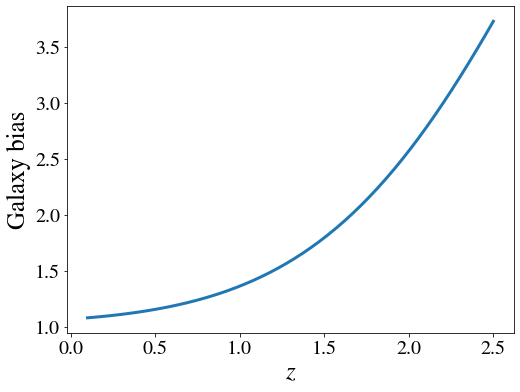

In [13]:
fig = plt.figure(figsize=(8,6))
plt.plot(z_bgal,b1_gal,linewidth=3,label='first order bias')
plt.xlabel(r'$z$',fontsize=25)
plt.ylabel('Galaxy bias',fontsize=25)
plt.tick_params(labelsize=20)
plt.savefig(plotprefix+"_bgal-vs-z.png",bbox_inches='tight')
plt.show()

<h1>Plots of unbinned Cl and covariance</h1>

0.9 1.019


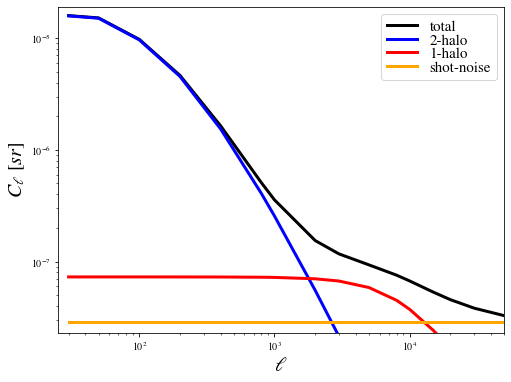

In [14]:
# Select redshift bin
izsel = 5
print(z[izsel],z[izsel+1])
# Plot Clgal
fig = plt.figure(figsize=(8,6))
plt.loglog(ell,Cl_tot_arr[:,izsel],color='black',label='total',lw=3)
plt.loglog(ell,Cl_2h_arr[:,izsel],color='blue',label='2-halo',lw=3)
plt.loglog(ell,Cl_1h_arr[:,izsel],color='red',label='1-halo',lw=3)
plt.loglog(ell,Cl_shot_arr[:,izsel],color='orange',label='shot-noise',lw=3)
plt.xlim([25,50100])
ymin=0.8*Cl_shot_arr[:,izsel].min() ; ymax=1.2*Cl_tot_arr[:,izsel].max()
plt.ylim([ymin,ymax])
plt.legend(labelspacing=0.0,fontsize=15,loc='upper right')
plt.ylabel('$C_\ell\  [sr]$',fontsize=20)
plt.xlabel('$\ell$',fontsize=20)
plt.show()

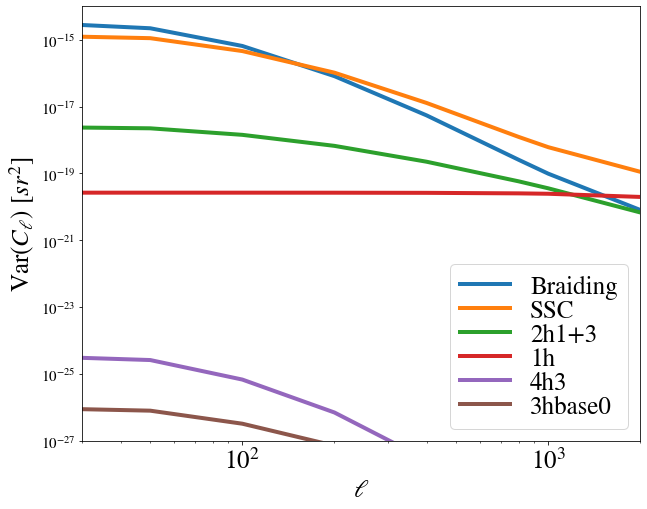

In [15]:
#Plot Var(Cl)
Var_SSC     = np.diag(CovCl_SSC_arr[:,izsel,:,izsel])
Var_1h      = np.diag(CovCl_1h_arr[:,izsel,:,izsel])
Var_2h1p3   = np.diag(CovCl_2h1p3_arr[:,izsel,:,izsel])
Var_3hbase0 = np.diag(CovCl_3hbase0_arr[:,izsel,:,izsel])
Var_4h3rd   = np.diag(CovCl_4h3rd_arr[:,izsel,:,izsel])
Var_Braid   = np.diag(CovCl_Braid_arr[:,izsel,:,izsel])
fig = plt.figure(figsize=(10,8))
plt.plot(ell,Var_Braid,lw=4,label='Braiding')
plt.loglog(ell,Var_SSC,lw=4,label='SSC')
plt.plot(ell,Var_2h1p3,lw=4,label='2h1+3')
plt.plot(ell,Var_1h,lw=4,label='1h')
plt.plot(ell,Var_4h3rd,lw=4,label='4h3')
plt.plot(ell,Var_3hbase0,lw=4,label='3hbase0')
plt.xlim([30,2000]) ; plt.ylim([1e-27,1e-14])
plt.xlabel('$\ell$',fontsize=25) ; plt.ylabel('$\mathrm{Var}(C_\ell)\  [sr^2]$',fontsize=25)
plt.xticks(fontsize=25) ; plt.yticks(fontsize=15)
plt.legend(labelspacing=0.0,fontsize=25,loc='lower right')
plt.savefig(plotprefix+"_Var-Clgal.png",bbox_inches='tight')
plt.show()

<h1>Load binned Cl and covariance</h1>

In [16]:
#define bins
nbins        = 50
binstakes    = np.round(np.exp(np.linspace(np.log(lmin),np.log(lmax),num=nbins+1)))
binwidth     = binstakes[1:len(binstakes)] - binstakes[0:(len(binstakes)-1)]
lcenter      = np.sqrt(binstakes[0:(len(binstakes)-1)]*binstakes[1:len(binstakes)])
loglcenter   = np.log(lcenter)
#define some particular indices for later use 
il500 = np.where(abs(binstakes-500)==abs(binstakes-500).min())[0][0]
il1000 = np.where(abs(binstakes-1000)==abs(binstakes-1000).min())[0][0]
il1200 = np.where(abs(binstakes-1200)==abs(binstakes-1200).min())[0][0]
il1500 = np.where(abs(binstakes-1500)==abs(binstakes-1500).min())[0][0]
il2000 = np.where(abs(binstakes-2000)==abs(binstakes-2000).min())[0][0]
iil2000 = il2000+1
il3000 = np.where(abs(binstakes-3000)==abs(binstakes-3000).min())[0][0]
print(binstakes[il2000],binstakes[il2000+1],lcenter[il2000])

1911.0 2217.0 2058.3214034742


In [17]:
#Load Cls from file
loadCl       = np.load(datfileprefix+"_Cl_binned_log_lmax50000.npz")
lcenter      = loadCl["lcenter"]
Cl_clust_bin = loadCl["Cl_clust_bin"]
Cl_tot_bin   = loadCl["Cl_tot_bin"]
#Load Covariance from file
loadCovCl          = np.load(datfileprefix+"_CovCl_binned_log_lmax50000.npz")
CovCl_G_bin        = loadCovCl["CovCl_G_bin"]
CovCl_SSC_bin      = loadCovCl["CovCl_SSC_bin"]
CovCl_1h_bin       = loadCovCl["CovCl_1h_bin"]
CovCl_2h1p3_bin    = loadCovCl["CovCl_2h1p3_bin"]
CovCl_3hbase0_bin  = loadCovCl["CovCl_3hbase0_bin"]
CovCl_4h3rd_bin    = loadCovCl["CovCl_4h3rd_bin"]
CovCl_Braid_bin    = loadCovCl["CovCl_Braid_bin"]
CovCl_ONG_bin      = loadCovCl["CovCl_ONG_bin"]
CovCl_tot_bin = CovCl_G_bin + CovCl_SSC_bin + CovCl_ONG_bin

<h2>Plot Cov(Cl)</h2>

0.9989799213772672
0.9983721500624757
-0.07492803931726837
7.372689648539445
38.71990520889878
7.49647837420414


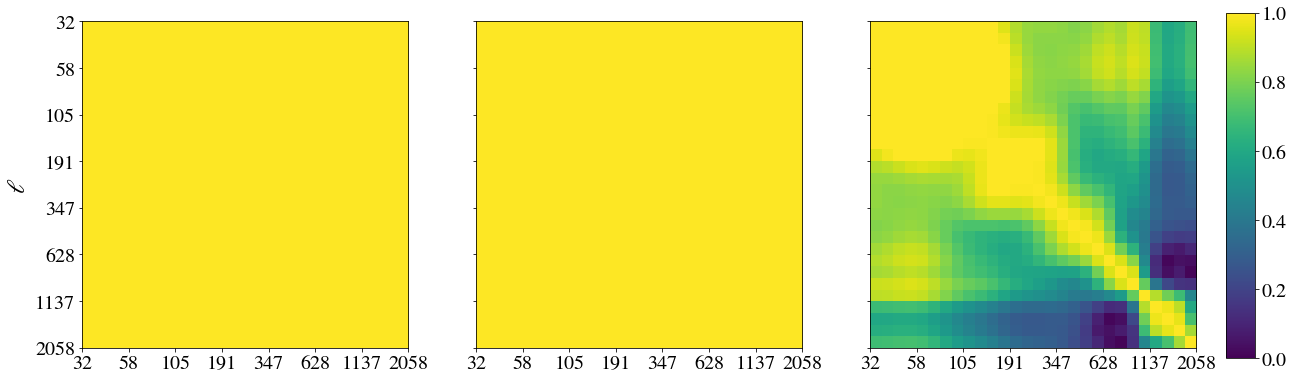

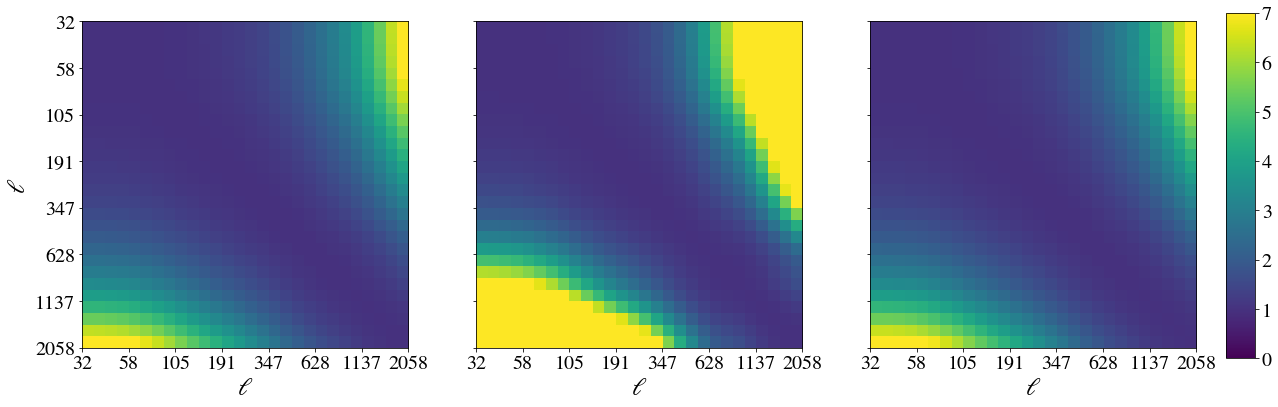

In [18]:
#Correlation plots
lmin = lcenter[0] ; lmax2000 = lcenter[il2000-1]
indexes = np.arange(0, il2000, 3) ; positions = indexes ; labels = np.asarray(lcenter[indexes], dtype=int)
indexes = np.arange(0, il2000+1, 4) ; positions = -0.5 + indexes; labels = np.asarray(lcenter[indexes], dtype=int)
fsz = 20 #fontsize
#SSC, 1h and braiding
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20, 6), ncols=3, sharey=True)
ax1.imshow(tooFab.NormalizeMatrix(CovCl_SSC_bin[:il2000,izsel,:il2000,izsel]),interpolation='none',vmin=0,vmax=1)
ax1.set_xticks(positions) ; ax1.set_xticklabels(labels,fontsize=fsz) ; ax1.set_yticks(positions) ; ax1.set_yticklabels(labels,fontsize=fsz)
ax1.set_ylabel(r'$\ell$',fontsize=25)
ax2.imshow(tooFab.NormalizeMatrix(CovCl_1h_bin[:il2000,izsel,:il2000,izsel]),interpolation='none',vmin=0,vmax=1)
ax2.set_xticks(positions) ; ax2.set_xticklabels(labels,fontsize=fsz) #; ax2.set_yticks(positions) ; ax2.set_yticklabels(labels,fontsize=fsz)
ax3.imshow(tooFab.NormalizeMatrix(abs(CovCl_Braid_bin)[:il2000,izsel,:il2000,izsel]),interpolation='none',vmin=0,vmax=1)
ax3.set_xticks(positions) ; ax3.set_xticklabels(labels,fontsize=fsz) #; ax3.set_yticks(positions) ; ax3.set_yticklabels(labels,fontsize=fsz)
ax4 = fig.add_axes([0.92, 0.1, 0.02, 0.8])
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
cbar = matplotlib.colorbar.ColorbarBase(ax4,norm=norm)
cbar.ax.tick_params(labelsize=fsz)
plt.savefig(plotprefix+"_Corr-Clgal_SSC-1h-Braid.png",bbox_inches='tight')
#2h,3h,4h
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20, 6), ncols=3, sharey=True)
ax1.imshow(tooFab.NormalizeMatrix(CovCl_2h1p3_bin[:il2000,izsel,:il2000,izsel]),interpolation='none',vmin=0,vmax=7)
ax1.set_xticks(positions) ; ax1.set_xticklabels(labels,fontsize=fsz) ; ax1.set_yticks(positions) ; ax1.set_yticklabels(labels,fontsize=fsz)
ax1.set_ylabel(r'$\ell$',fontsize=25) ; ax1.set_xlabel(r'$\ell$',fontsize=25)
ax2.imshow(tooFab.NormalizeMatrix(CovCl_3hbase0_bin[:il2000,izsel,:il2000,izsel]),interpolation='none',vmin=0,vmax=7)
ax2.set_xticks(positions) ; ax2.set_xticklabels(labels,fontsize=fsz) #; ax2.set_yticks(positions) ; ax2.set_yticklabels(labels,fontsize=fsz)
ax2.set_xlabel(r'$\ell$',fontsize=25)
ax3.imshow(tooFab.NormalizeMatrix(CovCl_4h3rd_bin[:il2000,izsel,:il2000,izsel]),interpolation='none',vmin=0,vmax=7)
ax3.set_xticks(positions) ; ax3.set_xticklabels(labels,fontsize=fsz) #; ax3.set_yticks(positions) ; ax3.set_yticklabels(labels,fontsize=fsz)
ax3.set_xlabel(r'$\ell$',fontsize=25)
ax4 = fig.add_axes([0.92, 0.1, 0.02, 0.8])
norm = matplotlib.colors.Normalize(vmin=0, vmax=7)
cbar = matplotlib.colorbar.ColorbarBase(ax4,norm=norm)
cbar.ax.tick_params(labelsize=fsz)
plt.savefig(plotprefix+"_Corr-Clgal_2h1p3-3hbase0-4h3.png",bbox_inches='tight')
#Print some values
print(tooFab.NormalizeMatrix(CovCl_SSC_bin[:il2000,izsel,:il2000,izsel]).min())
print(tooFab.NormalizeMatrix(CovCl_1h_bin[:il2000,izsel,:il2000,izsel]).min())
print(tooFab.NormalizeMatrix(CovCl_Braid_bin[:il2000,izsel,:il2000,izsel]).min())
print(tooFab.NormalizeMatrix(CovCl_2h1p3_bin[:il2000,izsel,:il2000,izsel]).max())
print(tooFab.NormalizeMatrix(CovCl_3hbase0_bin[:il2000,izsel,:il2000,izsel]).max())
print(tooFab.NormalizeMatrix(CovCl_4h3rd_bin[:il2000,izsel,:il2000,izsel]).max())

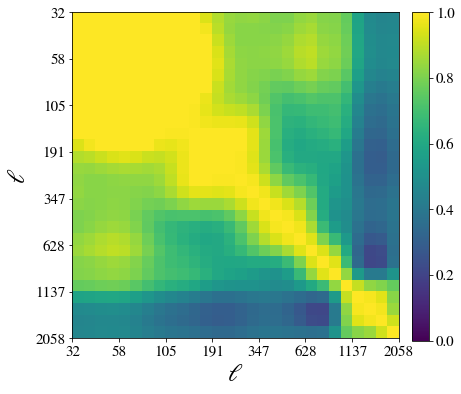

In [19]:
#ONG = Braiding + 1h + 2h1p3 + 3h-base0 + 4h-3
fsz = 15
fig, ax1 = plt.subplots(figsize=(6, 6), ncols=1)
ax1.imshow(tooFab.NormalizeMatrix(CovCl_ONG_bin[:il2000,izsel,:il2000,izsel]),interpolation='none',vmin=0,vmax=1)
ax1.set_xticks(positions) ; ax1.set_xticklabels(labels,fontsize=fsz) ; ax1.set_yticks(positions) ; ax1.set_yticklabels(labels,fontsize=fsz)
ax1.set_xlabel(r'$\ell$',fontsize=25) ; ax1.set_ylabel(r'$\ell$',fontsize=25)
ax2 = fig.add_axes([0.92, 0.12, 0.04, 0.76])
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
cbar = matplotlib.colorbar.ColorbarBase(ax2,norm=norm)
cbar.ax.tick_params(labelsize=fsz)
plt.savefig(plotprefix+"_Corr-Clgal_ONG.png",bbox_inches='tight')

<h1>S/N analysis</h1>

<h2>C(l)_gal, redshift by redshift</h2>

In [20]:
# Compute S/N ratio for any number of multipole bins, redshift by redshift
t0=time.time()
SNR_G_arr    = np.zeros((nbins,nz))
SNR_wSSC_arr = np.zeros((nbins,nz))
SNR_wS1h_arr = np.zeros((nbins,nz))
SNR_wONG_arr = np.zeros((nbins,nz))
SNR_tot_arr  = np.zeros((nbins,nz))
for iz in range(nz):
    for nbinmax in range(nbins):
        dvec                     = np.matrix(Cl_clust_bin[0:nbinmax,iz])
        cGau                     = np.matrix(CovCl_G_bin[0:nbinmax,iz,0:nbinmax,iz])
        cSSC                     = np.matrix(CovCl_SSC_bin[0:nbinmax,iz,0:nbinmax,iz])
        c1h                      = np.matrix(CovCl_1h_bin[0:nbinmax,iz,0:nbinmax,iz])
        cONG                     = np.matrix(CovCl_ONG_bin[0:nbinmax,iz,0:nbinmax,iz])
        SNR_G_arr[nbinmax,iz]    = np.sqrt(dvec*np.linalg.inv(cGau)*dvec.transpose())
        SNR_wSSC_arr[nbinmax,iz] = np.sqrt(dvec*np.linalg.inv(cGau+cSSC)*dvec.transpose())
        SNR_wS1h_arr[nbinmax,iz] = np.sqrt(dvec*np.linalg.inv(cGau+cSSC+c1h)*dvec.transpose())
        SNR_wONG_arr[nbinmax,iz] = np.sqrt(dvec*np.linalg.inv(cGau+cONG)*dvec.transpose())
        SNR_tot_arr[nbinmax,iz]  = np.sqrt(dvec*np.linalg.inv(cGau+cSSC+cONG)*dvec.transpose())
    print(iz+1,'/',nz,time.time()-t0)
print('S/N done',time.time()-t0)

1 / 10 0.1323094367980957
2 / 10 0.16888999938964844
3 / 10 0.20699524879455566
4 / 10 0.253737211227417
5 / 10 0.29079627990722656
6 / 10 0.3241868019104004
7 / 10 0.4123234748840332
8 / 10 0.45107316970825195
9 / 10 0.48639702796936035
10 / 10 0.521310567855835
S/N done 0.5215640068054199


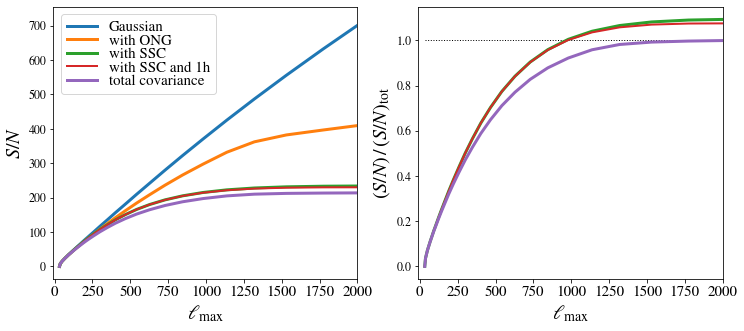

2058.3214034742 1.0756426538995645 1.0936789654693702 3.3613502925548686
1.7412404830521613 3.0734341600071744 3.3613502925548686
1.0936789654693702


In [21]:
# Plot cumulative SNR depending on max bin, for a given redshift bin
norm = SNR_tot_arr[il2000,izsel]
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(lcenter[:iil2000],SNR_G_arr[:iil2000,izsel]*sqfsky_Euclid,lw=3,label='Gaussian')
plt.plot(lcenter[:iil2000],SNR_wONG_arr[:iil2000,izsel]*sqfsky_Euclid,lw=3,label='with ONG',color=t10_cmap(1))
plt.plot(lcenter[:iil2000],SNR_wSSC_arr[:iil2000,izsel]*sqfsky_Euclid,lw=3,label='with SSC',color=t10_cmap(2))
plt.plot(lcenter[:iil2000],SNR_wS1h_arr[:iil2000,izsel]*sqfsky_Euclid,lw=2,label='with SSC and 1h',color=t10_cmap(3))
plt.plot(lcenter[:iil2000],SNR_tot_arr[:iil2000,izsel]*sqfsky_Euclid,lw=3,label='total covariance',color=t10_cmap(4))
plt.xlabel('$\ell_\mathrm{max}$',fontsize=20) ; plt.ylabel('$S/N$',fontsize=20)
plt.xticks(fontsize=15) ; plt.yticks(fontsize=12)
plt.legend(labelspacing=0.0,fontsize=15,loc='upper left')
plt.xlim([-10,2000])
# Zoom on NG curves
plt.subplot(1,2,2)
plt.plot(lcenter[:iil2000],0*lcenter[:iil2000]+1,lw=1,ls=':',color='black')
plt.plot(lcenter[:iil2000],SNR_wSSC_arr[:iil2000,izsel]/norm,lw=3,label='with SSC',color=t10_cmap(2))
plt.plot(lcenter[:iil2000],SNR_wS1h_arr[:iil2000,izsel]/norm,lw=2,label='with SSC and 1h',color=t10_cmap(3))
plt.plot(lcenter[:iil2000],SNR_tot_arr[:iil2000,izsel]/norm,lw=3,label='total covariance',color=t10_cmap(4))
plt.xlabel('$\ell_\mathrm{max}$',fontsize=20) ; plt.ylabel('$(S/N)\, / \, (S/N)_\mathrm{tot}$',fontsize=20)
plt.xticks(fontsize=15) ; plt.yticks(fontsize=12)
plt.xlim([-10,2000])
plt.savefig(plotprefix+"_SNR-Clgal.png",bbox_inches='tight')
plt.show()
print(lcenter[il2000],SNR_wS1h_arr[il2000,izsel]/SNR_tot_arr[il2000,izsel],SNR_wSSC_arr[il2000,izsel]/SNR_tot_arr[il2000,izsel],SNR_G_arr[il2000,izsel]/SNR_tot_arr[il2000,izsel])
print(SNR_G_arr[il2000,izsel]/SNR_wONG_arr[il2000,izsel],SNR_G_arr[il2000,izsel]/SNR_wSSC_arr[il2000,izsel],SNR_G_arr[il2000,izsel]/SNR_tot_arr[il2000,izsel])
print(SNR_wSSC_arr[il2000,izsel]/SNR_tot_arr[il2000,izsel])

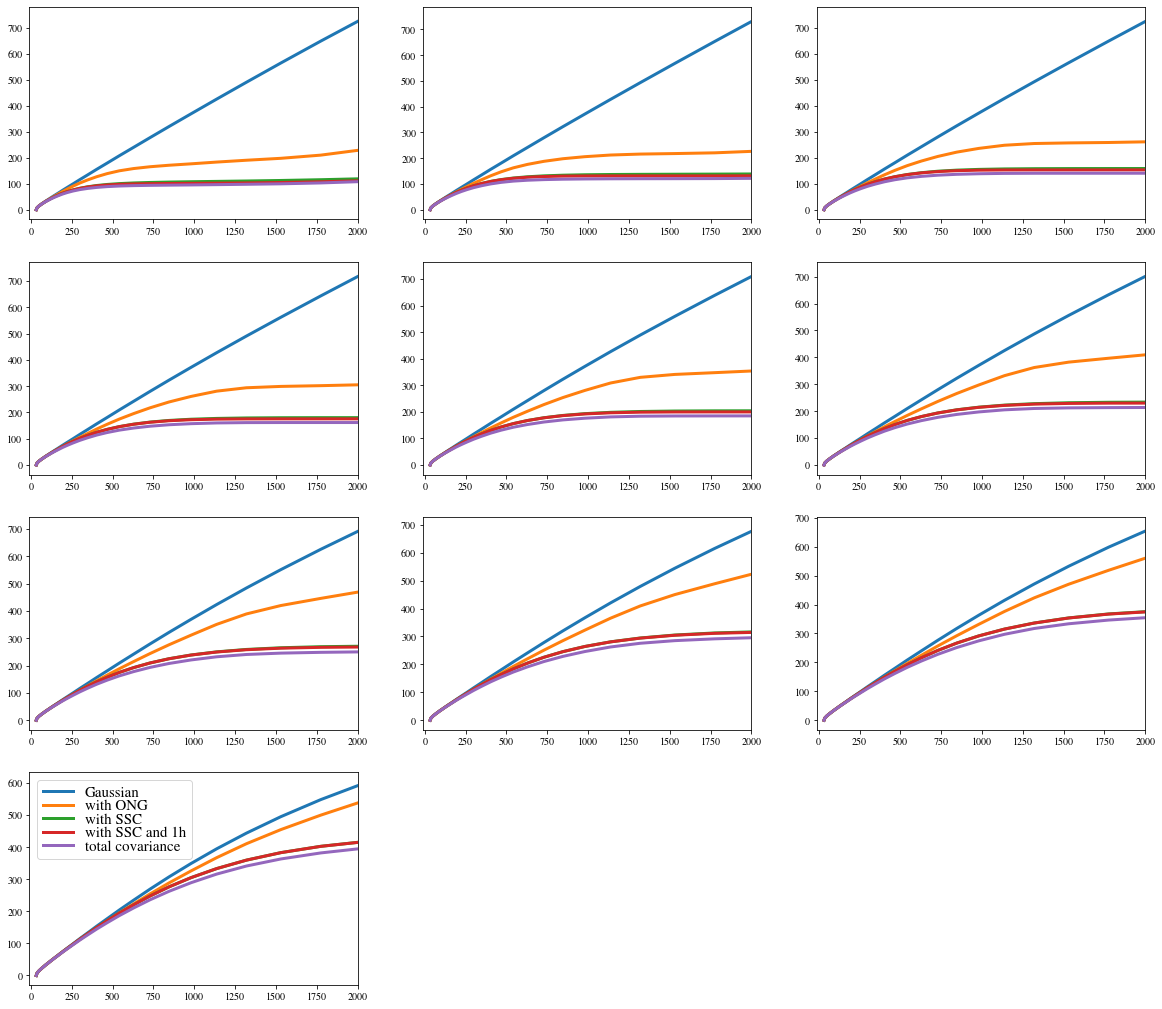

In [22]:
# Plot cumulative SNR, now for all redshift bins
fig = plt.figure(figsize=(20,18))
for iz in range(nz):
    plt.subplot(4,3,iz+1)
    plt.plot(lcenter[:iil2000],SNR_G_arr[:iil2000,iz]*sqfsky_Euclid,lw=3,label='Gaussian')
    plt.plot(lcenter[:iil2000],SNR_wONG_arr[:iil2000,iz]*sqfsky_Euclid,lw=3,label='with ONG')
    plt.plot(lcenter[:iil2000],SNR_wSSC_arr[:iil2000,iz]*sqfsky_Euclid,lw=3,label='with SSC')
    plt.plot(lcenter[:iil2000],SNR_wS1h_arr[:iil2000,iz]*sqfsky_Euclid,lw=3,label='with SSC and 1h')
    plt.plot(lcenter[:iil2000],SNR_tot_arr[:iil2000,iz]*sqfsky_Euclid,lw=3,label='total covariance')
    plt.xlim([-10,2000])
plt.legend(labelspacing=0.0,fontsize=15,loc='upper left')
plt.show()

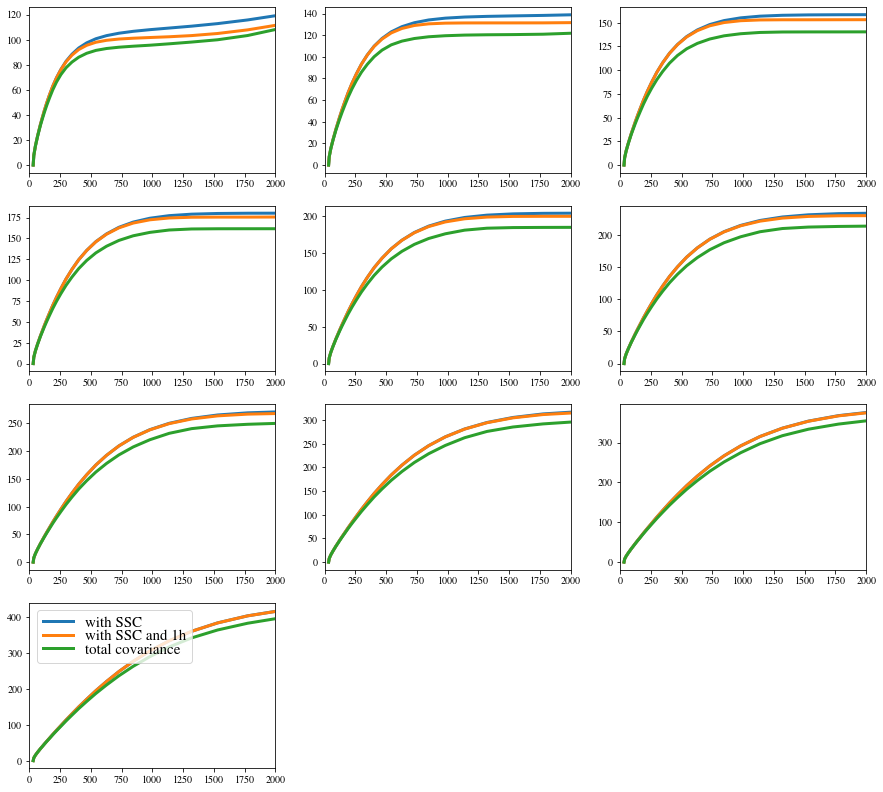

In [23]:
# Zoom on NG curves
fig = plt.figure(figsize=(15,14))
for iz in range(nz):
    plt.subplot(4,3,iz+1)
    plt.plot(lcenter[:iil2000],SNR_wSSC_arr[:iil2000,iz]*sqfsky_Euclid,lw=3,label='with SSC')
    plt.plot(lcenter[:iil2000],SNR_wS1h_arr[:iil2000,iz]*sqfsky_Euclid,lw=3,label='with SSC and 1h')
    plt.plot(lcenter[:iil2000],SNR_tot_arr[:iil2000,iz]*sqfsky_Euclid,lw=3,label='total covariance')
    plt.xlim([0,2000])
plt.legend(labelspacing=0.0,fontsize=15,loc='upper left')
plt.show()

<h2>C(l)_gal, total over all redshifts</h2>

In [24]:
# Make binned Cl into a vector
n_cl_bin_vec     = nbins*nz
ibins_vec        = np.zeros(n_cl_bin_vec,dtype=int)
iz_vec           = np.zeros(n_cl_bin_vec,dtype=int)
Cl_clust_bin_vec = np.zeros(n_cl_bin_vec)
Cl_tot_bin_vec   = np.zeros(n_cl_bin_vec)
c=0
for il in range(nbins):
    for iz in range(nz):
        ibins_vec[c]        = il
        iz_vec[c]           = iz
        Cl_clust_bin_vec[c] = Cl_clust_bin[il,iz]
        Cl_tot_bin_vec[c]   = Cl_tot_bin[il,iz]
        c+=1
# Now make binned covariance into matrix
CovCl_G_bin_vec   = np.zeros((n_cl_bin_vec,n_cl_bin_vec))
CovCl_SSC_bin_vec = np.zeros((n_cl_bin_vec,n_cl_bin_vec))
CovCl_ONG_bin_vec = np.zeros((n_cl_bin_vec,n_cl_bin_vec))
CovCl_1h_bin_vec  = np.zeros((n_cl_bin_vec,n_cl_bin_vec))
for c1 in range(n_cl_bin_vec):
    il = ibins_vec[c1]
    iz = iz_vec[c1]
    for c2 in range(n_cl_bin_vec):
        jl = ibins_vec[c2]
        jz = iz_vec[c2]
        CovCl_G_bin_vec[c1,c2]   = CovCl_G_bin[il,iz,jl,jz]
        CovCl_SSC_bin_vec[c1,c2] = CovCl_SSC_bin[il,iz,jl,jz]
        CovCl_ONG_bin_vec[c1,c2] = CovCl_ONG_bin[il,iz,jl,jz]
        CovCl_1h_bin_vec[c1,c2]  = CovCl_1h_bin[il,iz,jl,jz]

In [25]:
#Compute S/N
SNR_G_allz    = np.zeros(nbins)
SNR_wSSC_allz = np.zeros(nbins)
SNR_wONG_allz = np.zeros(nbins)
SNR_wS1h_allz = np.zeros(nbins)
SNR_tot_allz = np.zeros(nbins)
for nbinmax in range(nbins):
    wh                     = np.where(ibins_vec <= nbinmax)[0]
    dvec                   = np.matrix(Cl_clust_bin_vec[wh])
    cGau                   = np.matrix(np.take(np.take(CovCl_G_bin_vec,wh,0),wh,1))
    cSSC                   = np.matrix(np.take(np.take(CovCl_SSC_bin_vec,wh,0),wh,1))
    cONG                   = np.matrix(np.take(np.take(CovCl_ONG_bin_vec,wh,0),wh,1))
    c1h                    = np.matrix(np.take(np.take(CovCl_1h_bin_vec,wh,0),wh,1))
    truc_G                 = dvec*np.linalg.inv(cGau)*dvec.transpose()
    SNR_G_allz[nbinmax]    = np.sqrt(truc_G)
    truc_wSSC              = dvec*np.linalg.inv(cGau+cSSC)*dvec.transpose()
    SNR_wSSC_allz[nbinmax] = np.sqrt(truc_wSSC)
    truc_wONG              = dvec*np.linalg.inv(cGau+cONG)*dvec.transpose()
    SNR_wONG_allz[nbinmax] = np.sqrt(truc_wONG)
    truc_wS1h              = dvec*np.linalg.inv(cGau+cSSC+c1h)*dvec.transpose()
    SNR_wS1h_allz[nbinmax] = np.sqrt(truc_wS1h)
    truc_tot              = dvec*np.linalg.inv(cGau+cSSC+cONG)*dvec.transpose()
    SNR_tot_allz[nbinmax] = np.sqrt(truc_tot)

1.0739715442276345 3.213232592186277


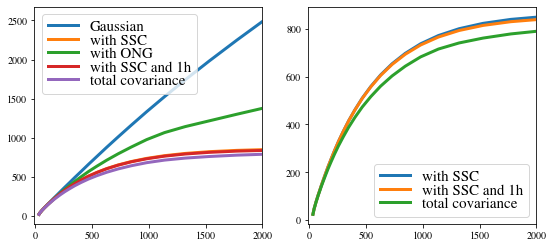

In [28]:
fig = plt.figure(figsize=(9,4))
# Plot cumulative SNR depending on max bin, for a given redshift bin
plt.subplot(1,2,1)
plt.plot(lcenter[:iil2000],SNR_G_allz[:iil2000]*sqfsky_Euclid,lw=3,label='Gaussian')
plt.plot(lcenter[:iil2000],SNR_wSSC_allz[:iil2000]*sqfsky_Euclid,lw=3,label='with SSC')
plt.plot(lcenter[:iil2000],SNR_wONG_allz[:iil2000]*sqfsky_Euclid,lw=3,label='with ONG')
plt.plot(lcenter[:iil2000],SNR_wS1h_allz[:iil2000]*sqfsky_Euclid,lw=3,label='with SSC and 1h')
plt.plot(lcenter[:iil2000],SNR_tot_allz[:iil2000]*sqfsky_Euclid,lw=3,label='total covariance')
plt.legend(labelspacing=0.0,fontsize=15,loc='upper left')
plt.xlim([-10,2000])

# Zoom on NG curve
plt.subplot(1,2,2)
plt.plot(lcenter[:iil2000],SNR_wSSC_allz[:iil2000]*sqfsky_Euclid,lw=3,label='with SSC')
plt.plot(lcenter[:iil2000],SNR_wS1h_allz[:iil2000]*sqfsky_Euclid,lw=3,label='with SSC and 1h')
plt.plot(lcenter[:iil2000],SNR_tot_allz[:iil2000]*sqfsky_Euclid,lw=3,label='total covariance')
plt.legend(labelspacing=0.0,fontsize=15,loc='lower right')
plt.xlim([-10,2000])

print(SNR_wSSC_allz[il2000]/SNR_tot_allz[il2000],SNR_G_allz[il2000]/SNR_tot_allz[il2000])

<h1>Fisher matrix analysis</h1>

In [29]:
#Name of model parameters
param_names       = ['HOD_alphasat','HOD_sigmalogM','HOD_Mratio','HODz_Mmin_a','HODz_Mmin_b','HODz_Mmin_c','HODz_Mmin_d','ombh2','omch2','hubble','sig8','ns','w0']
latex_param_names = [r'$\alpha_\mathrm{sat}$',r'$\sigma_{\log M}$',r'$M_{ratio}$','$M_{min}^a$','$M_{min}^b$','$M_{min}^c$','$M_{min}^d$','$\Omega_b h^2$','$\Omega_c h^2$','$h$','$\sigma_8$','$n_s$','$w_0$']
nparams           = len(param_names)
param_values      = [1.,0.5,10,11.0195,-0.143,0.549,-0.1048,0.022,0.12,0.67,0.81,0.96,-1]
#Define index of some special parameters, for later use
ipa = 0 ; ipmmin = 3 ; ipObh2 = 7 ; ipOch2 = 8 ; iph = 9 ; ipsig8 = 10 ; ipns = 11 ; ipw = 12
ipminhod = 0 ; ipmaxhod = 6 ; ipmincosmo = 7 ; ipmaxcosmo = 12
nphod = ipmaxhod - ipminhod + 1 ; npcosmo = ipmaxcosmo - ipmincosmo + 1

In [30]:
#Load dClbindparams from file
loaddCldp = np.load(datfileprefix+"_dCl_clust_bin_dparams.npz")
dCl_clust_bin_dparams = loaddCldp["dCl_clust_bin_dparams"]

<h2>Compute and plot Fisher matrices</h2>

<h2>Redshift by redshift</h2>

In [31]:
t0=time.time()
Fisher_G_perz    = np.zeros((nparams,nparams,nbins,nz))
Fisher_wSSC_perz = np.zeros((nparams,nparams,nbins,nz))
Fisher_wONG_perz = np.zeros((nparams,nparams,nbins,nz))
Fisher_wS1h_perz = np.zeros((nparams,nparams,nbins,nz))
Fisher_tot_perz   = np.zeros((nparams,nparams,nbins,nz))
for iz in range(nz):
    for nbinmax in range(nbins):
        cGau = np.matrix(CovCl_G_bin[0:nbinmax,iz,0:nbinmax,iz])
        cSSC = np.matrix(CovCl_SSC_bin[0:nbinmax,iz,0:nbinmax,iz])
        cONG = np.matrix(CovCl_ONG_bin[0:nbinmax,iz,0:nbinmax,iz])
        c1h  = np.matrix(CovCl_1h_bin[0:nbinmax,iz,0:nbinmax,iz])
        icGau = np.linalg.inv(cGau)
        icwSSC = np.linalg.inv(cGau+cSSC)
        icwONG = np.linalg.inv(cGau+cONG)
        icwS1h = np.linalg.inv(cGau+cSSC+c1h)
        ictot  = np.linalg.inv(cGau+cSSC+cONG)
        for ip in range(nparams):
            dvec1 = np.matrix(dCl_clust_bin_dparams[ip,0:nbinmax,iz])
            for jp in range(nparams):
                dvec2 = np.matrix(dCl_clust_bin_dparams[jp,0:nbinmax,iz])
                Fisher_G_perz[ip,jp,nbinmax,iz]    = dvec1 * icGau  * dvec2.transpose()
                Fisher_wSSC_perz[ip,jp,nbinmax,iz] = dvec1 * icwSSC * dvec2.transpose()
                Fisher_wONG_perz[ip,jp,nbinmax,iz] = dvec1 * icwONG * dvec2.transpose()
                Fisher_wS1h_perz[ip,jp,nbinmax,iz] = dvec1 * icwS1h * dvec2.transpose()
                Fisher_tot_perz[ip,jp,nbinmax,iz]  = dvec1 * ictot * dvec2.transpose()
    print(iz+1,'/',nz,time.time()-t0)

1 / 10 0.8095743656158447
2 / 10 1.6623053550720215
3 / 10 2.6836740970611572
4 / 10 3.5707950592041016
5 / 10 4.412599563598633
6 / 10 5.355645418167114
7 / 10 6.385511159896851
8 / 10 7.371291160583496
9 / 10 8.277147769927979
10 / 10 9.14334487915039


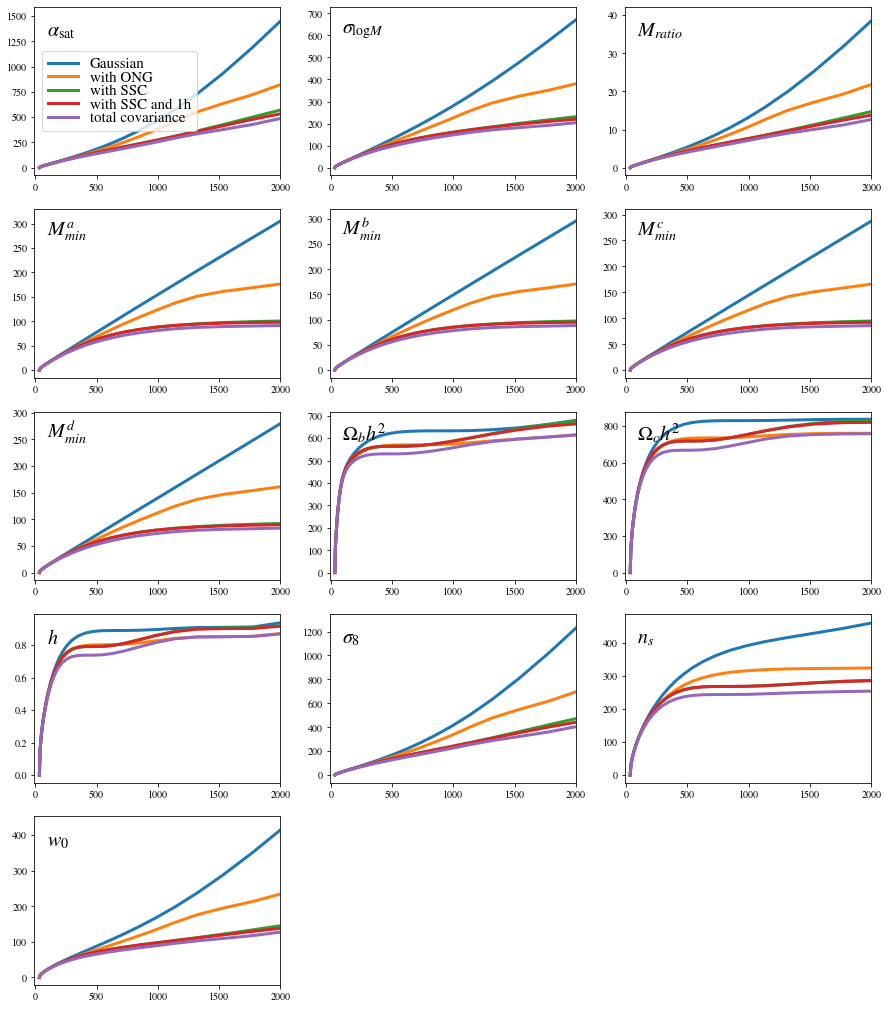

In [32]:
#Plot cumulative Fisher depending on max bin for all params, for a given redshift bin
fig = plt.figure(figsize=(15,18))
for ip in range(nparams):
    ax = plt.subplot(5,3,ip+1)
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_G_perz[ip,ip,:iil2000,izsel])*sqfsky_Euclid,lw=3,label='Gaussian')
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_wONG_perz[ip,ip,:iil2000,izsel])*sqfsky_Euclid,lw=3,label='with ONG')
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_wSSC_perz[ip,ip,:iil2000,izsel])*sqfsky_Euclid,lw=3,label='with SSC')
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_wS1h_perz[ip,ip,:iil2000,izsel])*sqfsky_Euclid,lw=3,label='with SSC and 1h')
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_tot_perz[ip,ip,:iil2000,izsel])*sqfsky_Euclid,lw=3,label='total covariance')
    plt.text(0.05, 0.8, latex_param_names[ip], fontsize=20, verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes)
    plt.xlim([-10,2000])
    if (ip==0):
        plt.legend(labelspacing=0.0,fontsize=15,loc='center left')
plt.show()

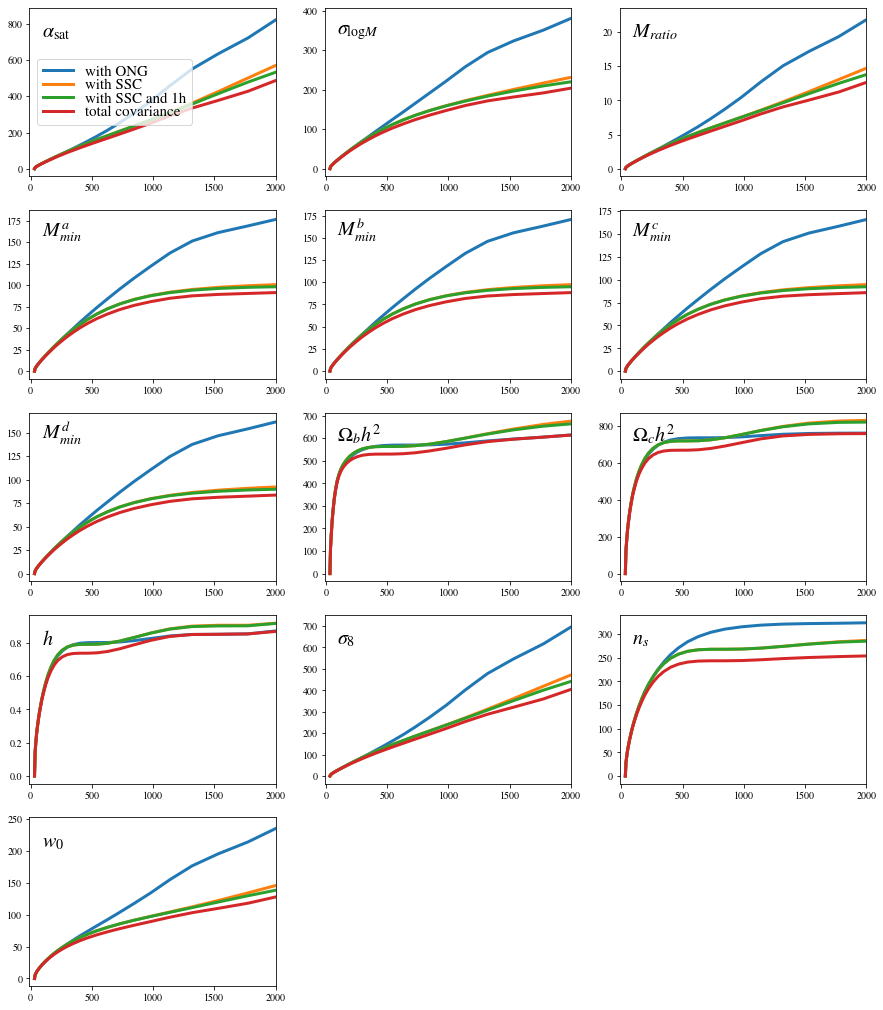

In [33]:
#Same but zoomed on NG curves
fig = plt.figure(figsize=(15,18))
for ip in range(nparams):
    ax = plt.subplot(5,3,ip+1)
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_wONG_perz[ip,ip,:iil2000,izsel])*sqfsky_Euclid,lw=3,label='with ONG')
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_wSSC_perz[ip,ip,:iil2000,izsel])*sqfsky_Euclid,lw=3,label='with SSC')
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_wS1h_perz[ip,ip,:iil2000,izsel])*sqfsky_Euclid,lw=3,label='with SSC and 1h')
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_tot_perz[ip,ip,:iil2000,izsel])*sqfsky_Euclid,lw=3,label='total covariance')
    plt.text(0.05, 0.8, latex_param_names[ip], fontsize=20, verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes)
    plt.xlim([-10,2000])
    if (ip==0):
        plt.legend(labelspacing=0.0,fontsize=15,loc='center left')
plt.show()

ombh2 1.1090710935811712 1.0066822959389492 1.1105308628875818 1.1031592264685366
omch2 1.1005885853978115 1.0084335205370878 1.104153618492004 1.0949195916295367
hubble 1.077682632663144 1.0249183346794757 1.0821459528413042 1.05583627126714
sig8 1.7921676093093775 2.64335403015577 3.0839649450221835 1.1666863045357752
ns 1.4312691470575813 1.614631043738079 1.8247565256217408 1.1301383883944125
w0 1.7966850190552153 2.9067125096482855 3.3156659173383622 1.140692760750378


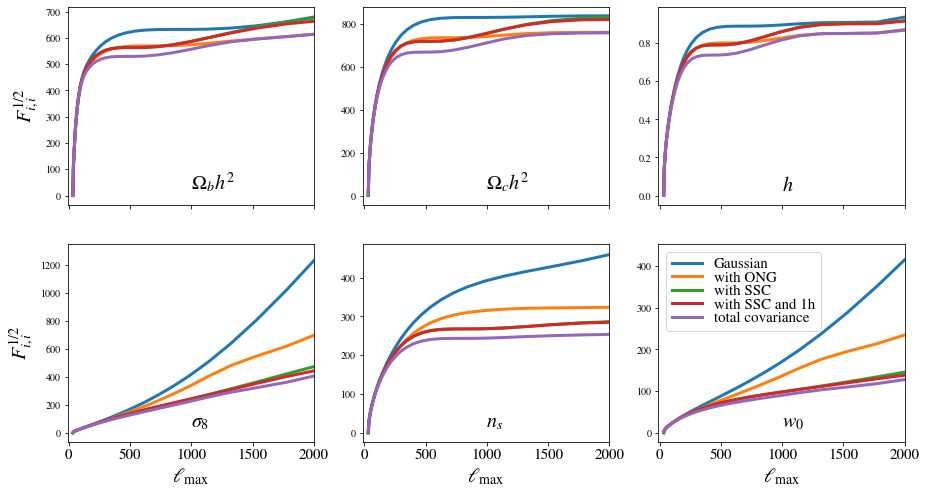

In [34]:
#Plot cumulative Fisher for a given redshift bin, cosmo-only
fig = plt.figure(figsize=(15,8))
for ip in range(7,nparams):
    ax = plt.subplot(2,3,ip-6)
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_G_perz[ip,ip,:iil2000,izsel])*sqfsky_Euclid,lw=3,label='Gaussian')
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_wONG_perz[ip,ip,:iil2000,izsel])*sqfsky_Euclid,lw=3,label='with ONG')
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_wSSC_perz[ip,ip,:iil2000,izsel])*sqfsky_Euclid,lw=3,label='with SSC')
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_wS1h_perz[ip,ip,:iil2000,izsel])*sqfsky_Euclid,lw=3,label='with SSC and 1h')
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_tot_perz[ip,ip,:iil2000,izsel])*sqfsky_Euclid,lw=3,label='total covariance')
    plt.text(0.5, 0.05, latex_param_names[ip], fontsize=20, verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes)
    plt.xlim([-10,2000])
    #if (ip==(nparams-1)):
    if ip==ipw:
        plt.legend(labelspacing=0.0,fontsize=15,loc='upper left')
    if (ip==ipsig8 or ip==ipns or ip==ipw):
        plt.xticks(fontsize=15)
        plt.xlabel('$\ell_\mathrm{max}$',fontsize=20)
    if (ip==ipObh2 or ip==ipOch2 or ip==iph):
        plt.xticks(fontsize=0)
    if (ip==ipObh2 or ip==ipsig8):
        plt.ylabel('$F_{i,i}^{1/2}$',fontsize=20)
plt.savefig(plotprefix+"_Fisher-cosmo-Clgal.png",bbox_inches='tight')
#Print info decrease ratio for some params
for ip in range(7,nparams):
    FG   = Fisher_G_perz[ip,ip,il2000,izsel]
    FONG = Fisher_wONG_perz[ip,ip,il2000,izsel]
    FSSC = Fisher_wSSC_perz[ip,ip,il2000,izsel]
    Ftot = Fisher_tot_perz[ip,ip,il2000,izsel]
    print(param_names[ip],np.sqrt(FG/FONG),np.sqrt(FG/FSSC),np.sqrt(FG/Ftot),np.sqrt(FSSC/Ftot))

HOD_alphasat 1.7890676763513285 2.57832785564349 3.019289633000352 1.171026262774021
HOD_sigmalogM 1.7909569599993291 2.957867196780307 3.358429237788564 1.135422591468703
HOD_Mratio 1.7915831207802362 2.6574588418765166 3.0946480742954625 1.1645140182529536
HODz_Mmin_a 1.7603281622327511 3.1106480829392327 3.4263726674550403 1.1014980081634569
HODz_Mmin_b 1.7614184594557396 3.111015356863329 3.4287594227193496 1.1021351646995354
HODz_Mmin_c 1.7626943712744385 3.1112567193012075 3.4313926994233963 1.102896034948248
HODz_Mmin_d 1.7639094643660218 3.111253751590996 3.4337062470087365 1.1036406931619924


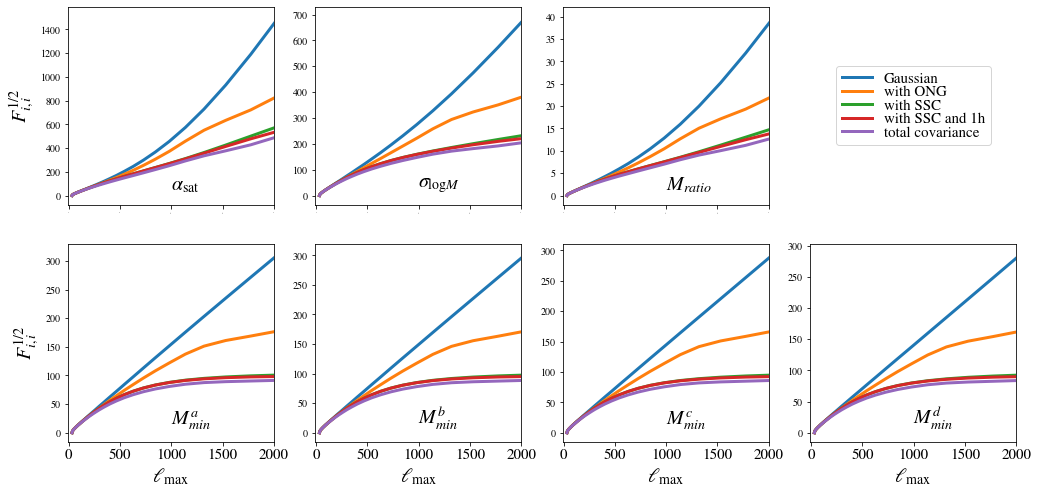

In [35]:
#Plot cumulative Fisher for a given redshift bin, HOD-only
fig = plt.figure(figsize=(17,8))
#alphasat, siglogM,Mratio
for ip in range(3):
    ax = plt.subplot(2,4,ip+1)
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_G_perz[ip,ip,:iil2000,izsel])*sqfsky_Euclid,lw=3,label='Gaussian')
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_wONG_perz[ip,ip,:iil2000,izsel])*sqfsky_Euclid,lw=3,label='with ONG')
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_wSSC_perz[ip,ip,:iil2000,izsel])*sqfsky_Euclid,lw=3,label='with SSC')
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_wS1h_perz[ip,ip,:iil2000,izsel])*sqfsky_Euclid,lw=3,label='with SSC and 1h')
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_tot_perz[ip,ip,:iil2000,izsel])*sqfsky_Euclid,lw=3,label='total covariance')
    plt.text(0.5, 0.05, latex_param_names[ip], fontsize=20, verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes)
    plt.xlim([-10,2000]) ; plt.xticks(fontsize=0)
    if ip==0:
        plt.ylabel('$F_{i,i}^{1/2}$',fontsize=20)
#Shadow plot for legend
ax = plt.subplot(2,4,4)
plt.plot(lcenter[:iil2000],0*lcenter[:iil2000],lw=3,label='Gaussian')
plt.plot(lcenter[:iil2000],0*lcenter[:iil2000],lw=3,label='with ONG')
plt.plot(lcenter[:iil2000],0*lcenter[:iil2000],lw=3,label='with SSC')
plt.plot(lcenter[:iil2000],0*lcenter[:iil2000],lw=3,label='with SSC and 1h')
plt.plot(lcenter[:iil2000],0*lcenter[:iil2000],lw=3,label='total covariance')
plt.xlim([-10,2000]) ; plt.ylim([1,2])
plt.legend(labelspacing=0.0,fontsize=15,loc='center')
plt.axis('off')
#Mmin_a,b,c,d
for ip in range(3,7):
    ax = plt.subplot(2,4,ip+2)
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_G_perz[ip,ip,:iil2000,izsel])*sqfsky_Euclid,lw=3,label='Gaussian')
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_wONG_perz[ip,ip,:iil2000,izsel])*sqfsky_Euclid,lw=3,label='with ONG')
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_wSSC_perz[ip,ip,:iil2000,izsel])*sqfsky_Euclid,lw=3,label='with SSC')
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_wS1h_perz[ip,ip,:iil2000,izsel])*sqfsky_Euclid,lw=3,label='with SSC and 1h')
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_tot_perz[ip,ip,:iil2000,izsel])*sqfsky_Euclid,lw=3,label='total covariance')
    plt.text(0.5, 0.05, latex_param_names[ip], fontsize=20, verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes)
    plt.xlim([-10,2000]) ; plt.xticks(fontsize=15)
    plt.xlabel(r'$\ell_\mathrm{max}$',fontsize=20)
    if ip==3:
        plt.ylabel('$F_{i,i}^{1/2}$',fontsize=20)
plt.savefig(plotprefix+"_Fisher-HOD-Clgal.png",bbox_inches='tight')
for ip in range(ipminhod,ipmaxhod+1):
    FG   = Fisher_G_perz[ip,ip,il2000,izsel]
    FONG = Fisher_wONG_perz[ip,ip,il2000,izsel]
    FSSC = Fisher_wSSC_perz[ip,ip,il2000,izsel]
    Ftot = Fisher_tot_perz[ip,ip,il2000,izsel]
    print(param_names[ip],np.sqrt(FG/FONG),np.sqrt(FG/FSSC),np.sqrt(FG/Ftot),np.sqrt(FSSC/Ftot))

<h2>All redshifts</h2>

In [36]:
#Make derivatives into vector
dCl_clust_bin_vec_dparams = np.zeros((nparams,nbins*nz))
for ip in range(nparams):
    dCl_clust_bin_vec_dparams[ip,:] = dCl_clust_bin_dparams[ip,ibins_vec,iz_vec]

In [37]:
#Compute Fisher matrix depending on lmax
Fisher_G_allz    = np.zeros((nparams,nparams,nbins))
Fisher_wSSC_allz = np.zeros((nparams,nparams,nbins))
Fisher_wONG_allz = np.zeros((nparams,nparams,nbins))
Fisher_wS1h_allz = np.zeros((nparams,nparams,nbins))
Fisher_tot_allz = np.zeros((nparams,nparams,nbins))
for nbinmax in range(nbins):
    wh   = np.where(ibins_vec <= nbinmax)[0]
    cGau = np.matrix(np.take(np.take(CovCl_G_bin_vec,wh,0),wh,1))
    cSSC = np.matrix(np.take(np.take(CovCl_SSC_bin_vec,wh,0),wh,1))
    cONG = np.matrix(np.take(np.take(CovCl_ONG_bin_vec,wh,0),wh,1))
    c1h  = np.matrix(np.take(np.take(CovCl_1h_bin_vec,wh,0),wh,1))
    icGau  = np.linalg.inv(cGau)
    icwSSC = np.linalg.inv(cGau+cSSC)
    icwONG = np.linalg.inv(cGau+cONG)
    icwS1h = np.linalg.inv(cGau+cSSC+c1h)
    ictot  = np.linalg.inv(cGau+cSSC+cONG)
    for ip in range(nparams):
        dvec1 = np.matrix(dCl_clust_bin_vec_dparams[ip,wh])
        for jp in range(nparams):
            dvec2                           = np.matrix(dCl_clust_bin_vec_dparams[jp,wh])
            Fisher_G_allz[ip,jp,nbinmax]    = dvec1 * icGau  * dvec2.transpose()
            Fisher_wSSC_allz[ip,jp,nbinmax] = dvec1 * icwSSC * dvec2.transpose()
            Fisher_wONG_allz[ip,jp,nbinmax] = dvec1 * icwONG * dvec2.transpose()
            Fisher_wS1h_allz[ip,jp,nbinmax] = dvec1 * icwS1h * dvec2.transpose()
            Fisher_tot_allz[ip,jp,nbinmax]  = dvec1 * ictot * dvec2.transpose()

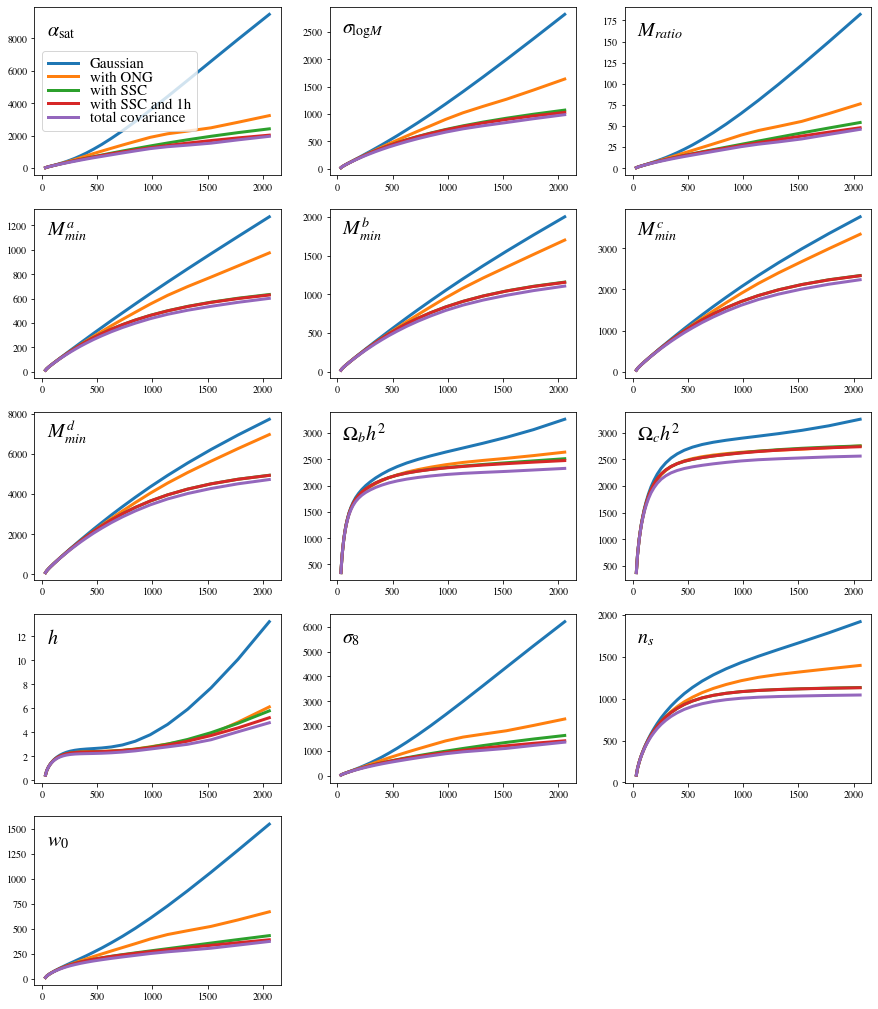

In [38]:
#Plot cumulative Fisher depending on max bin for all params
fig = plt.figure(figsize=(15,18))
for ip in range(nparams):
    ax = plt.subplot(5,3,ip+1)
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_G_allz[ip,ip,:iil2000])*sqfsky_Euclid,lw=3,label='Gaussian')
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_wONG_allz[ip,ip,:iil2000])*sqfsky_Euclid,lw=3,label='with ONG')
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_wSSC_allz[ip,ip,:iil2000])*sqfsky_Euclid,lw=3,label='with SSC')
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_wS1h_allz[ip,ip,:iil2000])*sqfsky_Euclid,lw=3,label='with SSC and 1h')
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_tot_allz[ip,ip,:iil2000])*sqfsky_Euclid,lw=3,label='total covariance')
    plt.text(0.05, 0.8, latex_param_names[ip], fontsize=20, verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes)
    if (ip==0):
        plt.legend(labelspacing=0.0,fontsize=15,loc='center left')
plt.show()

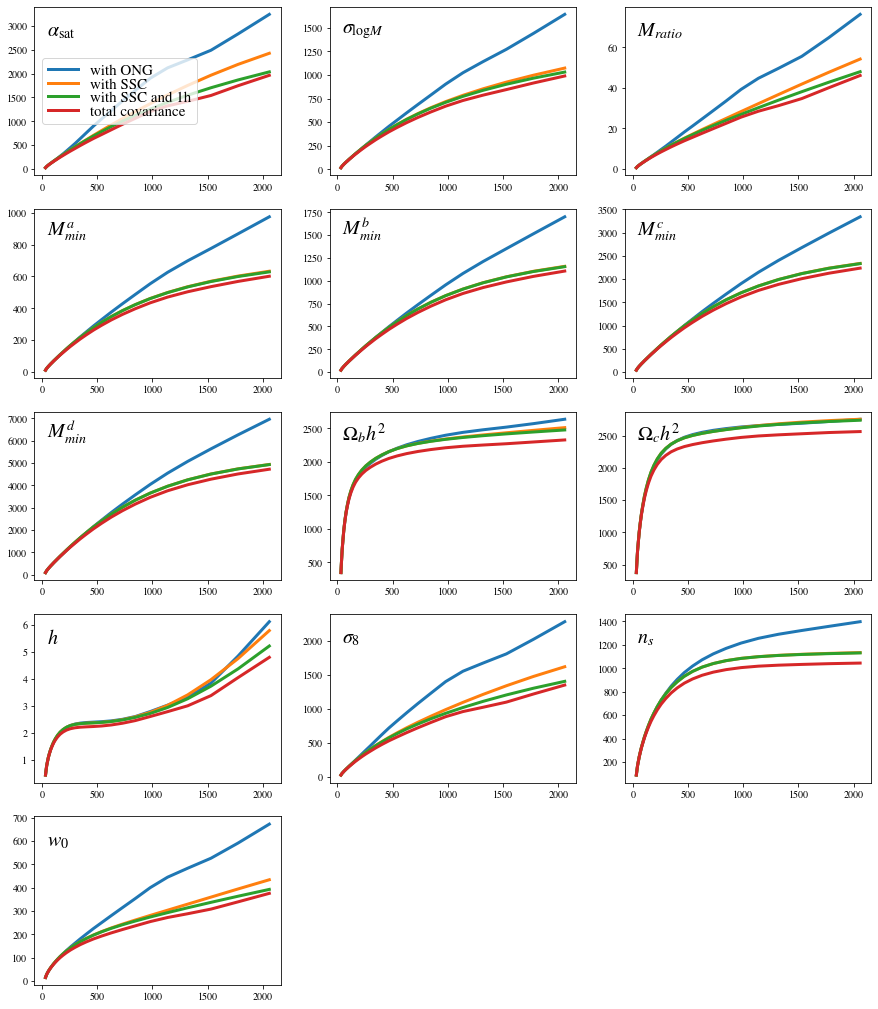

In [39]:
#Same but zoomed on NG curves
fig = plt.figure(figsize=(15,18))
for ip in range(nparams):
    ax = plt.subplot(5,3,ip+1)
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_wONG_allz[ip,ip,:iil2000])*sqfsky_Euclid,lw=3,label='with ONG')
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_wSSC_allz[ip,ip,:iil2000])*sqfsky_Euclid,lw=3,label='with SSC')
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_wS1h_allz[ip,ip,:iil2000])*sqfsky_Euclid,lw=3,label='with SSC and 1h')
    plt.plot(lcenter[:iil2000],np.sqrt(Fisher_tot_allz[ip,ip,:iil2000])*sqfsky_Euclid,lw=3,label='total covariance')
    plt.text(0.05, 0.8, latex_param_names[ip], fontsize=20, verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes)
    if (ip==0):
        plt.legend(labelspacing=0.0,fontsize=15,loc='center left')
plt.show()

In [40]:
# Print factor increase of error by non-Gaussianity before marginalization
for ip in range(7,nparams):
    FG   = Fisher_G_allz[ip,ip,il2000]
    FS1h = Fisher_wS1h_allz[ip,ip,il2000]
    Ftot = Fisher_tot_allz[ip,ip,il2000]
    print(param_names[ip],np.sqrt(FG/FS1h),np.sqrt(FG/Ftot))
print('')
# Same but in form +x%
for ip in range(7,nparams):
    FG   = Fisher_G_allz[ip,ip,il2000]
    FS1h = Fisher_wS1h_allz[ip,ip,il2000]
    Ftot = Fisher_tot_allz[ip,ip,il2000]
    print(param_names[ip],100*(np.sqrt(FG/FS1h)-1),'% ',100*(np.sqrt(FG/Ftot)-1),'% ')

ombh2 1.317402562014431 1.4018113584527636
omch2 1.188340437229354 1.2696719855488383
hubble 2.5358320044428093 2.757988949987595
sig8 4.414583015373681 4.593333380400073
ns 1.6976360644977835 1.8385526879391443
w0 3.9465305136089786 4.124348511899035

ombh2 31.740256201443096 %  40.18113584527636 % 
omch2 18.8340437229354 %  26.96719855488383 % 
hubble 153.58320044428092 %  175.7988949987595 % 
sig8 341.45830153736813 %  359.3333380400073 % 
ns 69.76360644977835 %  83.85526879391443 % 
w0 294.65305136089785 %  312.43485118990344 % 


<h3>Now marginalise, i.e. invert Fisher</h3>

In [41]:
#Compute inverse of Fisher matrix depending on lmax
iFisher_G_allz    = np.zeros((nparams,nparams,nbins))
iFisher_wSSC_allz = np.zeros((nparams,nparams,nbins))
iFisher_wONG_allz = np.zeros((nparams,nparams,nbins))
iFisher_wS1h_allz = np.zeros((nparams,nparams,nbins))
iFisher_tot_allz  = np.zeros((nparams,nparams,nbins))
for nbinmax in range(nbins):
    iFisher_G_allz[:,:,nbinmax]    = np.linalg.inv(Fisher_G_allz[:,:,nbinmax])
    iFisher_wSSC_allz[:,:,nbinmax] = np.linalg.inv(Fisher_wSSC_allz[:,:,nbinmax])
    iFisher_wONG_allz[:,:,nbinmax] = np.linalg.inv(Fisher_wONG_allz[:,:,nbinmax])
    iFisher_wS1h_allz[:,:,nbinmax] = np.linalg.inv(Fisher_wS1h_allz[:,:,nbinmax])
    iFisher_tot_allz[:,:,nbinmax]  = np.linalg.inv(Fisher_tot_allz[:,:,nbinmax])

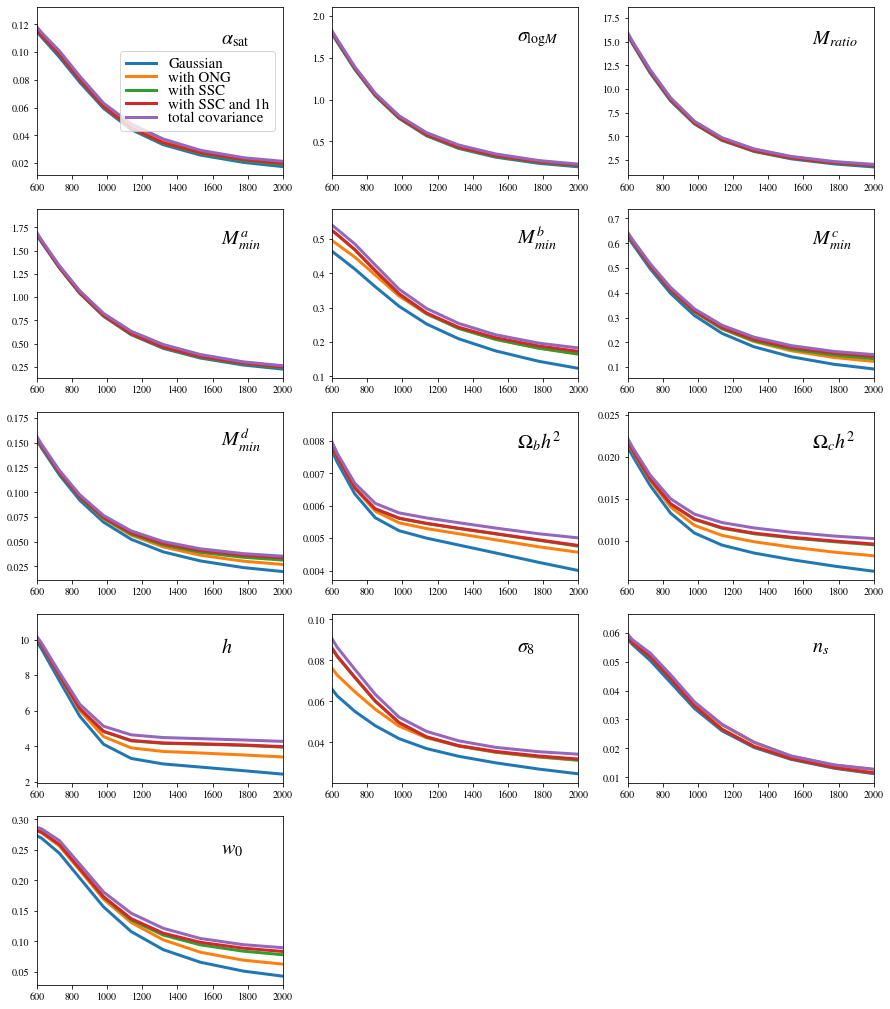

In [42]:
#Plot iFisher, all parameters
fig = plt.figure(figsize=(15,18))
for ip in range(nparams):
    ax = plt.subplot(5,3,ip+1)
    plt.plot(lcenter[il500:iil2000],np.sqrt(iFisher_G_allz[ip,ip,il500:iil2000])/sqfsky_Euclid,lw=3,label='Gaussian')
    plt.plot(lcenter[il500:iil2000],np.sqrt(iFisher_wONG_allz[ip,ip,il500:iil2000])/sqfsky_Euclid,lw=3,label='with ONG')
    plt.plot(lcenter[il500:iil2000],np.sqrt(iFisher_wSSC_allz[ip,ip,il500:iil2000])/sqfsky_Euclid,lw=3,label='with SSC')
    plt.plot(lcenter[il500:iil2000],np.sqrt(iFisher_wS1h_allz[ip,ip,il500:iil2000])/sqfsky_Euclid,lw=3,label='with SSC and 1h')
    plt.plot(lcenter[il500:iil2000],np.sqrt(iFisher_tot_allz[ip,ip,il500:iil2000])/sqfsky_Euclid,lw=3,label='total covariance')
    plt.text(0.75, 0.75, latex_param_names[ip], fontsize=20, verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes)
    plt.xlim([600,2000])
    if (ip==0):
        plt.legend(labelspacing=0.0,fontsize=15,loc='center right')
plt.show()

ombh2 1.1481976591218788 1.1948641027027491 1.20111659582632 1.263187201498627 1.057180643925391
omch2 1.30314245780294 1.5146659723430456 1.5306826169404366 1.6369068413140833 1.0807048360517024
hubble 1.414191094041398 1.6488007038914663 1.6609623454106202 1.786850764731132 1.0837275605922796
sig8 1.2839504303727671 1.285498436217695 1.30818428727852 1.4092695408752722 1.0962825789362662
ns 1.1422047547875527 1.0156054969633248 1.026017219240947 1.1509668536247617 1.1332814336532928
w0 1.4986379993499164 1.8819846593897693 2.015990935782585 2.170793162722786 1.1534595417088378


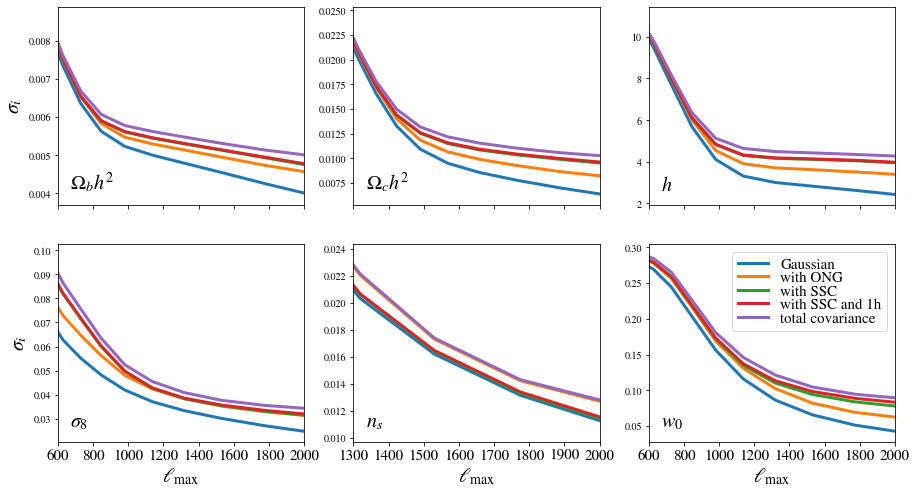

In [43]:
#Plot iFisher, i.e. marginalised error bars, cosmo-only
ipns=11
fig = plt.figure(figsize=(15,8))
for ip in range(7,nparams):
    ax = plt.subplot(2,3,ip-6)
    plt.plot(lcenter[il500:iil2000],np.sqrt(iFisher_G_allz[ip,ip,il500:iil2000])/sqfsky_Euclid,lw=3,label='Gaussian')
    plt.plot(lcenter[il500:iil2000],np.sqrt(iFisher_wONG_allz[ip,ip,il500:iil2000])/sqfsky_Euclid,lw=3,label='with ONG')
    plt.plot(lcenter[il500:iil2000],np.sqrt(iFisher_wSSC_allz[ip,ip,il500:iil2000])/sqfsky_Euclid,lw=3,label='with SSC')
    plt.plot(lcenter[il500:iil2000],np.sqrt(iFisher_wS1h_allz[ip,ip,il500:iil2000])/sqfsky_Euclid,lw=3,label='with SSC and 1h')
    plt.plot(lcenter[il500:iil2000],np.sqrt(iFisher_tot_allz[ip,ip,il500:iil2000])/sqfsky_Euclid,lw=3,label='total covariance')
    plt.text(0.05, 0.05, latex_param_names[ip], fontsize=20, verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes)
    plt.xlim([600,2000])
    if ip==ipw:
        plt.legend(labelspacing=0.0,fontsize=15,loc='upper right')
    if (ip==ipsig8 or ip==ipns or ip==ipw):
        plt.xticks(fontsize=15)
        plt.xlabel('$\ell_\mathrm{max}$',fontsize=20)
    if (ip==ipObh2 or ip==ipOch2 or ip==iph):
        plt.xticks(fontsize=0)
    if (ip==ipObh2 or ip==ipsig8):
        plt.ylabel('$\sigma_i$',fontsize=20)
    if (ip==ipns): #Special for ns, otherwise not much visible
        plt.xlim([1300,2000])
        ymin = 0.9*np.sqrt(iFisher_G_allz[ipns,ipns,il2000]/fsky_Euclid)
        ymax = 1.1*np.sqrt(iFisher_tot_allz[ipns,ipns,il1200]/fsky_Euclid)
        plt.ylim([ymin,ymax])
plt.savefig(plotprefix+"_marginalised-error-cosmo-Clgal.png",bbox_inches='tight')
#Print some factors of increase of error bars
for ip in range(ipmincosmo,ipmaxcosmo+1):
    iFG   = iFisher_G_allz[ip,ip,il2000]
    iFONG = iFisher_wONG_allz[ip,ip,il2000]
    iFSSC = iFisher_wSSC_allz[ip,ip,il2000]
    iFS1h = iFisher_wS1h_allz[ip,ip,il2000]
    iFtot = iFisher_tot_allz[ip,ip,il2000]
    print(param_names[ip],np.sqrt(iFONG/iFG),np.sqrt(iFSSC/iFG),np.sqrt(iFS1h/iFG),np.sqrt(iFtot/iFG),np.sqrt(iFtot/iFSSC))

HOD_alphasat 1.1870310623266487 1.0916554848180477 1.2362917086435354 1.132492554507336
HOD_sigmalogM 1.1242538439129754 1.0710327215759563 1.173027011291524 1.0952298540099592
HOD_Mratio 1.123085405662899 1.0856226425780233 1.1658478623309951 1.0738978873565692
HODz_Mmin_a 1.141471094560971 1.0747458248271748 1.1728030051379001 1.0912375540760937
HODz_Mmin_b 1.3705263042791138 1.3541979536589608 1.5152105804672649 1.1188988850361632
HODz_Mmin_c 1.3558565247550438 1.4853330673054164 1.676968390559714 1.1290184184763008
HODz_Mmin_d 1.3901263165762996 1.6385190561513554 1.8499854570573215 1.1290594699598246


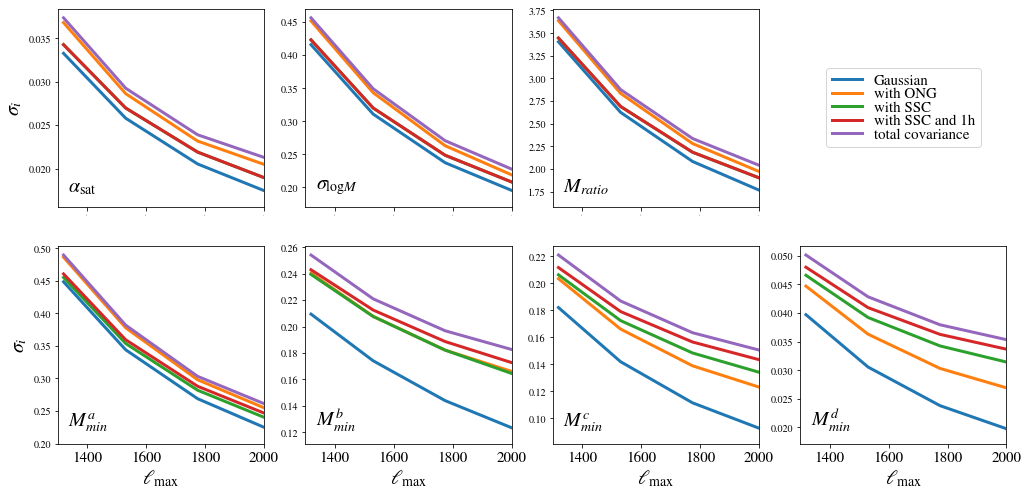

In [44]:
#Plot iFisher, i.e. marginalised error bars, HOD-only
fig = plt.figure(figsize=(17,8))
#alphasat, siglogM,Mratio
for ip in range(3):
    ax = plt.subplot(2,4,ip+1)
    plt.plot(lcenter[il1200:iil2000],np.sqrt(iFisher_G_allz[ip,ip,il1200:iil2000])/sqfsky_Euclid,lw=3,label='Gaussian')
    plt.plot(lcenter[il1200:iil2000],np.sqrt(iFisher_wONG_allz[ip,ip,il1200:iil2000])/sqfsky_Euclid,lw=3,label='with ONG')
    plt.plot(lcenter[il1200:iil2000],np.sqrt(iFisher_wSSC_allz[ip,ip,il1200:iil2000])/sqfsky_Euclid,lw=3,label='with SSC')
    plt.plot(lcenter[il1200:iil2000],np.sqrt(iFisher_wSSC_allz[ip,ip,il1200:iil2000])/sqfsky_Euclid,lw=3,label='with SSC and 1h')
    plt.plot(lcenter[il1200:iil2000],np.sqrt(iFisher_tot_allz[ip,ip,il1200:iil2000])/sqfsky_Euclid,lw=3,label='total covariance')
    plt.text(0.05, 0.05, latex_param_names[ip], fontsize=20, verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes)
    plt.xlim([1300,2000])
    plt.xticks(fontsize=0)
    if (ip==0):
        plt.ylabel('$\sigma_i$',fontsize=20)
#Shadow plot for legend
ax = plt.subplot(2,4,4)
plt.plot(lcenter[:iil2000],0*lcenter[:iil2000],lw=3,label='Gaussian')
plt.plot(lcenter[:iil2000],0*lcenter[:iil2000],lw=3,label='with ONG')
plt.plot(lcenter[:iil2000],0*lcenter[:iil2000],lw=3,label='with SSC')
plt.plot(lcenter[:iil2000],0*lcenter[:iil2000],lw=3,label='with SSC and 1h')
plt.plot(lcenter[:iil2000],0*lcenter[:iil2000],lw=3,label='total covariance')
plt.xlim([1300,2000]) ; plt.ylim([1,2])
plt.legend(labelspacing=0.0,fontsize=15,loc='center')
plt.axis('off')
#Mmin_a,b,c,d
for ip in range(3,7):
    ax = plt.subplot(2,4,ip+2)
    plt.plot(lcenter[il1200:iil2000],np.sqrt(iFisher_G_allz[ip,ip,il1200:iil2000])/sqfsky_Euclid,lw=3,label='Gaussian')
    plt.plot(lcenter[il1200:iil2000],np.sqrt(iFisher_wONG_allz[ip,ip,il1200:iil2000])/sqfsky_Euclid,lw=3,label='with ONG')
    plt.plot(lcenter[il1200:iil2000],np.sqrt(iFisher_wSSC_allz[ip,ip,il1200:iil2000])/sqfsky_Euclid,lw=3,label='with SSC')
    plt.plot(lcenter[il1200:iil2000],np.sqrt(iFisher_wS1h_allz[ip,ip,il1200:iil2000])/sqfsky_Euclid,lw=3,label='with SSC and 1h')
    plt.plot(lcenter[il1200:iil2000],np.sqrt(iFisher_tot_allz[ip,ip,il1200:iil2000])/sqfsky_Euclid,lw=3,label='total covariance')
    plt.text(0.05, 0.05, latex_param_names[ip], fontsize=20, verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes)
    plt.xlim([1300,2000])
    plt.xticks(fontsize=15)
    plt.xlabel('$\ell_\mathrm{max}$',fontsize=20)
    if (ip==3):
        plt.ylabel('$\sigma_i$',fontsize=20)
plt.savefig(plotprefix+"_marginalised-error-HOD-Clgal.png",bbox_inches='tight')
#Print some factors of increase of error bars
for ip in range(ipminhod,ipmaxhod+1):
    iFG   = iFisher_G_allz[ip,ip,il2000]
    iFONG = iFisher_wONG_allz[ip,ip,il2000]
    iFSSC = iFisher_wSSC_allz[ip,ip,il2000]
    iFtot = iFisher_tot_allz[ip,ip,il2000]
    print(param_names[ip],np.sqrt(iFONG/iFG),np.sqrt(iFSSC/iFG),np.sqrt(iFtot/iFG),np.sqrt(iFtot/iFSSC))

<h3>Ellipses to see parameter degeneracies</h3>

<h4>Cosmo, marginalised over HOD</h4>

In [45]:
#Compute marginalisation over HOD
Fisher_G_allz_cosmo_HODmarged    = np.zeros((npcosmo,npcosmo,nbins))
Fisher_wONG_allz_cosmo_HODmarged = np.zeros((npcosmo,npcosmo,nbins))
Fisher_wSSC_allz_cosmo_HODmarged = np.zeros((npcosmo,npcosmo,nbins))
Fisher_wS1h_allz_cosmo_HODmarged = np.zeros((npcosmo,npcosmo,nbins))
Fisher_tot_allz_cosmo_HODmarged  = np.zeros((npcosmo,npcosmo,nbins))
for ibin in range(nbins):
    Fisher_G_allz_cosmo_HODmarged[:,:,ibin]    = np.linalg.inv(iFisher_G_allz[ipmincosmo:(ipmaxcosmo+1),ipmincosmo:(ipmaxcosmo+1),ibin])
    Fisher_wONG_allz_cosmo_HODmarged[:,:,ibin] = np.linalg.inv(iFisher_wONG_allz[ipmincosmo:(ipmaxcosmo+1),ipmincosmo:(ipmaxcosmo+1),ibin])
    Fisher_wSSC_allz_cosmo_HODmarged[:,:,ibin] = np.linalg.inv(iFisher_wSSC_allz[ipmincosmo:(ipmaxcosmo+1),ipmincosmo:(ipmaxcosmo+1),ibin])
    Fisher_wS1h_allz_cosmo_HODmarged[:,:,ibin] = np.linalg.inv(iFisher_wS1h_allz[ipmincosmo:(ipmaxcosmo+1),ipmincosmo:(ipmaxcosmo+1),ibin])
    Fisher_tot_allz_cosmo_HODmarged[:,:,ibin]  = np.linalg.inv(iFisher_tot_allz[ipmincosmo:(ipmaxcosmo+1),ipmincosmo:(ipmaxcosmo+1),ibin])

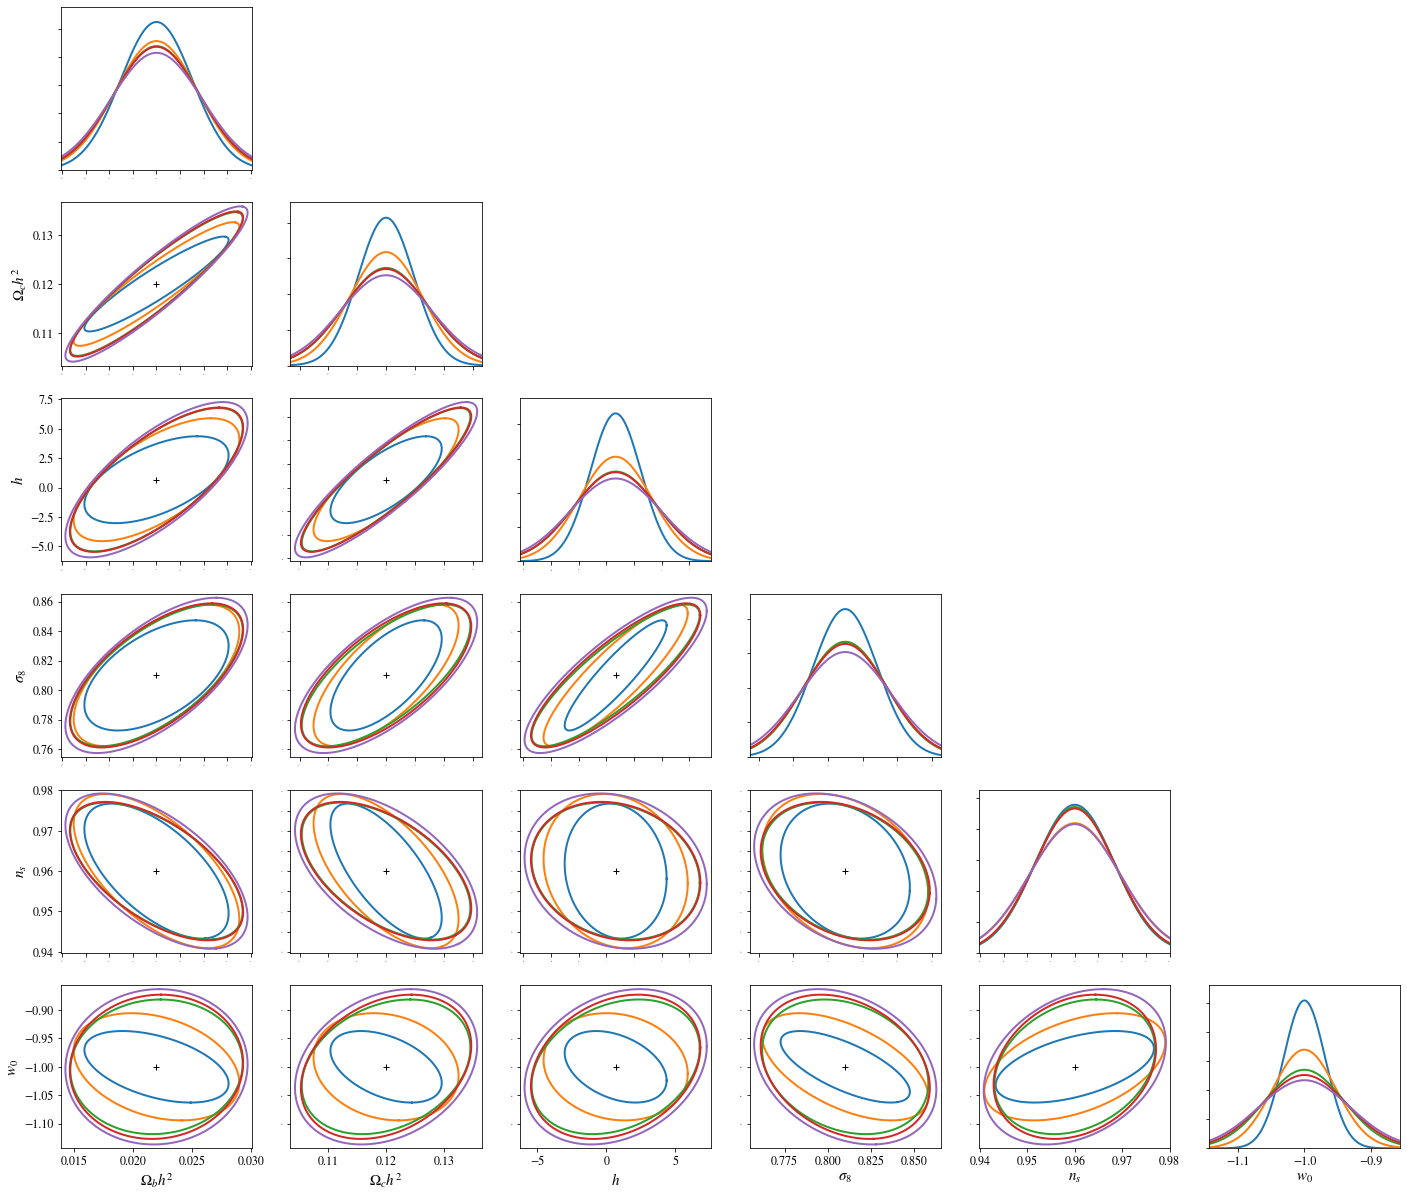

In [46]:
#Plot ellipses at il2000
Fisher_dico = {0:Fisher_G_allz_cosmo_HODmarged[:,:,il2000]*sqfsky_Euclid,1:Fisher_wONG_allz_cosmo_HODmarged[:,:,il2000]*sqfsky_Euclid,2:Fisher_wSSC_allz_cosmo_HODmarged[:,:,il2000]*sqfsky_Euclid,3:Fisher_wS1h_allz_cosmo_HODmarged[:,:,il2000]*sqfsky_Euclid,4:Fisher_tot_allz_cosmo_HODmarged[:,:,il2000]*sqfsky_Euclid}
colors=[t10_cmap(0),t10_cmap(1),t10_cmap(2),t10_cmap(3),t10_cmap(4)]
FisherPlot.oplot_FisherMatrix(param_values[ipmincosmo:(ipmaxcosmo+1)],Fisher_dico,latex_param_names[ipmincosmo:(ipmaxcosmo+1)],colors=colors)

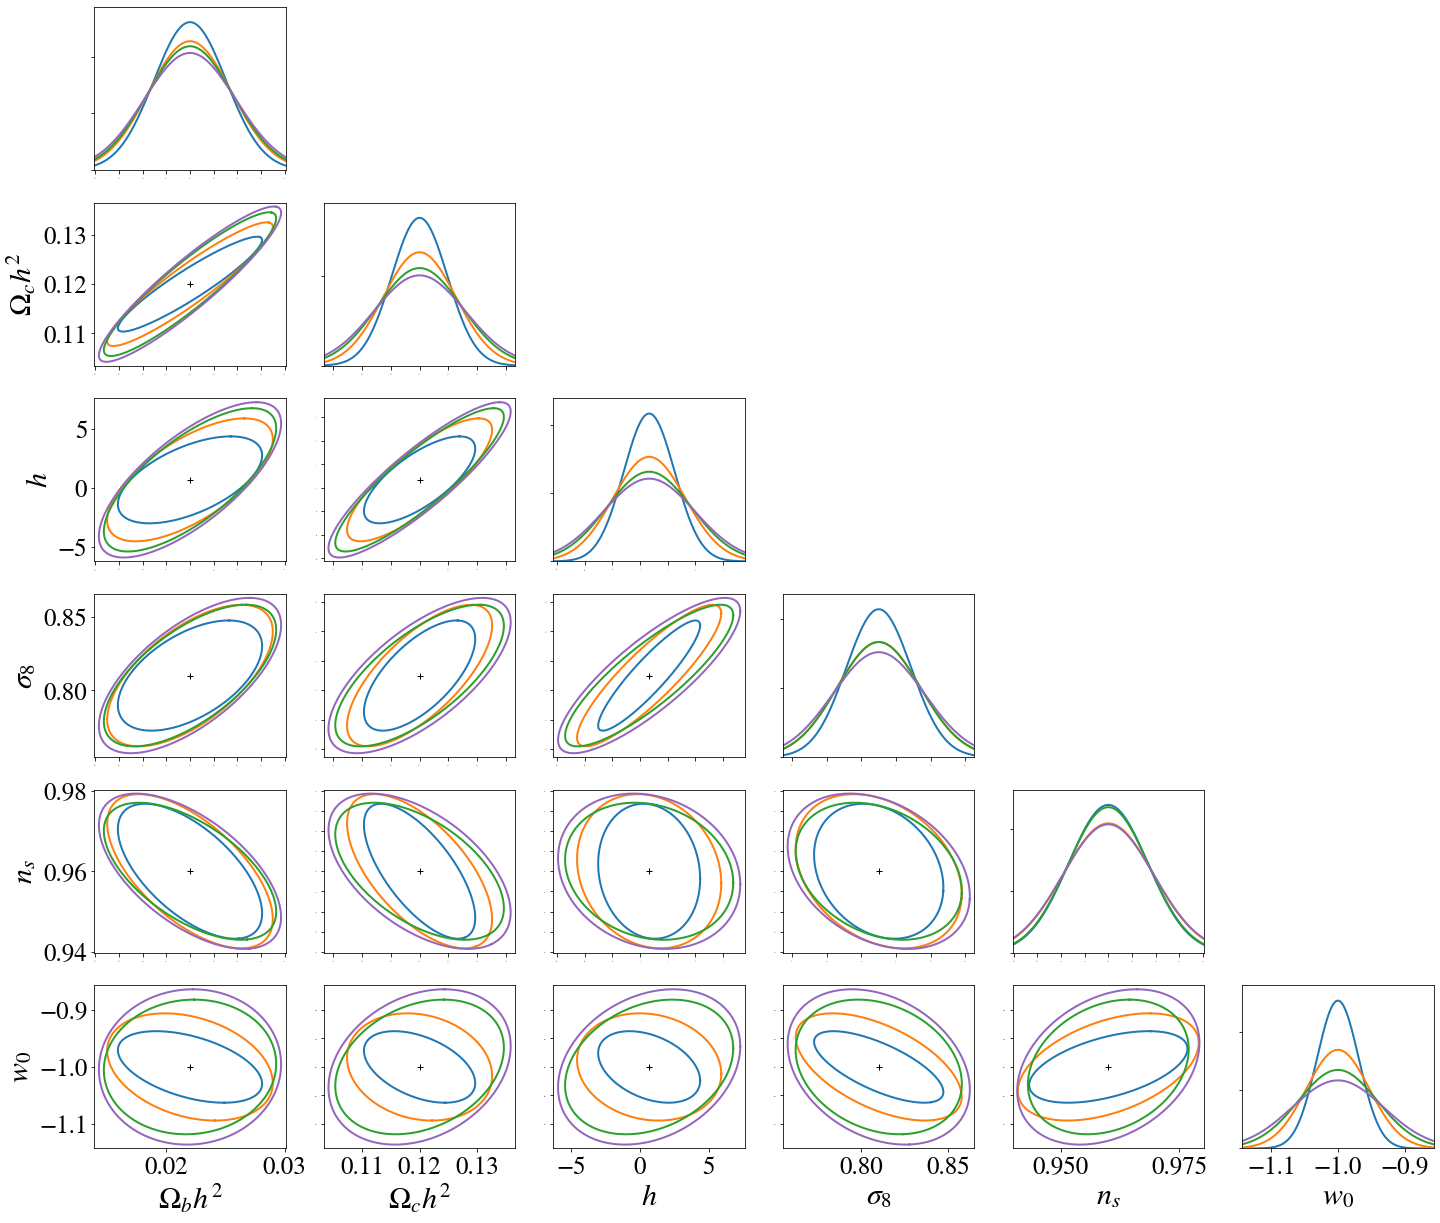

In [47]:
#Same but without S1h
Fisher_dico = {0:Fisher_G_allz_cosmo_HODmarged[:,:,il2000]*sqfsky_Euclid,1:Fisher_wONG_allz_cosmo_HODmarged[:,:,il2000]*sqfsky_Euclid,2:Fisher_wSSC_allz_cosmo_HODmarged[:,:,il2000]*sqfsky_Euclid,3:Fisher_tot_allz_cosmo_HODmarged[:,:,il2000]*sqfsky_Euclid}
colors=[t10_cmap(0),t10_cmap(1),t10_cmap(2),t10_cmap(4)]
FisherPlot.oplot_FisherMatrix(param_values[ipmincosmo:(ipmaxcosmo+1)],Fisher_dico,latex_param_names[ipmincosmo:(ipmaxcosmo+1)],colors=colors,fontsize=30,labelsize=25)
plt.savefig(plotprefix+"_ellipses-cosmo-Clgal.png",bbox_inches='tight')

In [48]:
#Print some condition numbers, to see whether matrices are more or less degenerate
print("{:4.2e}".format(np.linalg.cond(Fisher_G_allz_cosmo_HODmarged[:,:,il2000])))
print("{:4.2e}".format(np.linalg.cond(Fisher_wONG_allz_cosmo_HODmarged[:,:,il2000])))
print("{:4.2e}".format(np.linalg.cond(Fisher_wSSC_allz_cosmo_HODmarged[:,:,il2000])))
print("{:4.2e}".format(np.linalg.cond(Fisher_tot_allz_cosmo_HODmarged[:,:,il2000])))

4.77e+07
8.66e+07
1.29e+08
1.38e+08


<h4>HOD, marginalised over cosmo</h4>

In [49]:
#Compute marginalisation over cosmo
Fisher_G_allz_HOD_cosmomarged    = np.zeros((nphod,nphod,nbins))
Fisher_wONG_allz_HOD_cosmomarged = np.zeros((nphod,nphod,nbins))
Fisher_wSSC_allz_HOD_cosmomarged = np.zeros((nphod,nphod,nbins))
Fisher_wS1h_allz_HOD_cosmomarged = np.zeros((nphod,nphod,nbins))
Fisher_tot_allz_HOD_cosmomarged  = np.zeros((nphod,nphod,nbins))
for ibin in range(nbins):
    Fisher_G_allz_HOD_cosmomarged[:,:,ibin]    = np.linalg.inv(iFisher_G_allz[ipminhod:(ipmaxhod+1),ipminhod:(ipmaxhod+1),ibin])
    Fisher_wONG_allz_HOD_cosmomarged[:,:,ibin] = np.linalg.inv(iFisher_wONG_allz[ipminhod:(ipmaxhod+1),ipminhod:(ipmaxhod+1),ibin])
    Fisher_wSSC_allz_HOD_cosmomarged[:,:,ibin] = np.linalg.inv(iFisher_wSSC_allz[ipminhod:(ipmaxhod+1),ipminhod:(ipmaxhod+1),ibin])
    Fisher_wS1h_allz_HOD_cosmomarged[:,:,ibin] = np.linalg.inv(iFisher_wS1h_allz[ipminhod:(ipmaxhod+1),ipminhod:(ipmaxhod+1),ibin])
    Fisher_tot_allz_HOD_cosmomarged[:,:,ibin]  = np.linalg.inv(iFisher_tot_allz[ipminhod:(ipmaxhod+1),ipminhod:(ipmaxhod+1),ibin])

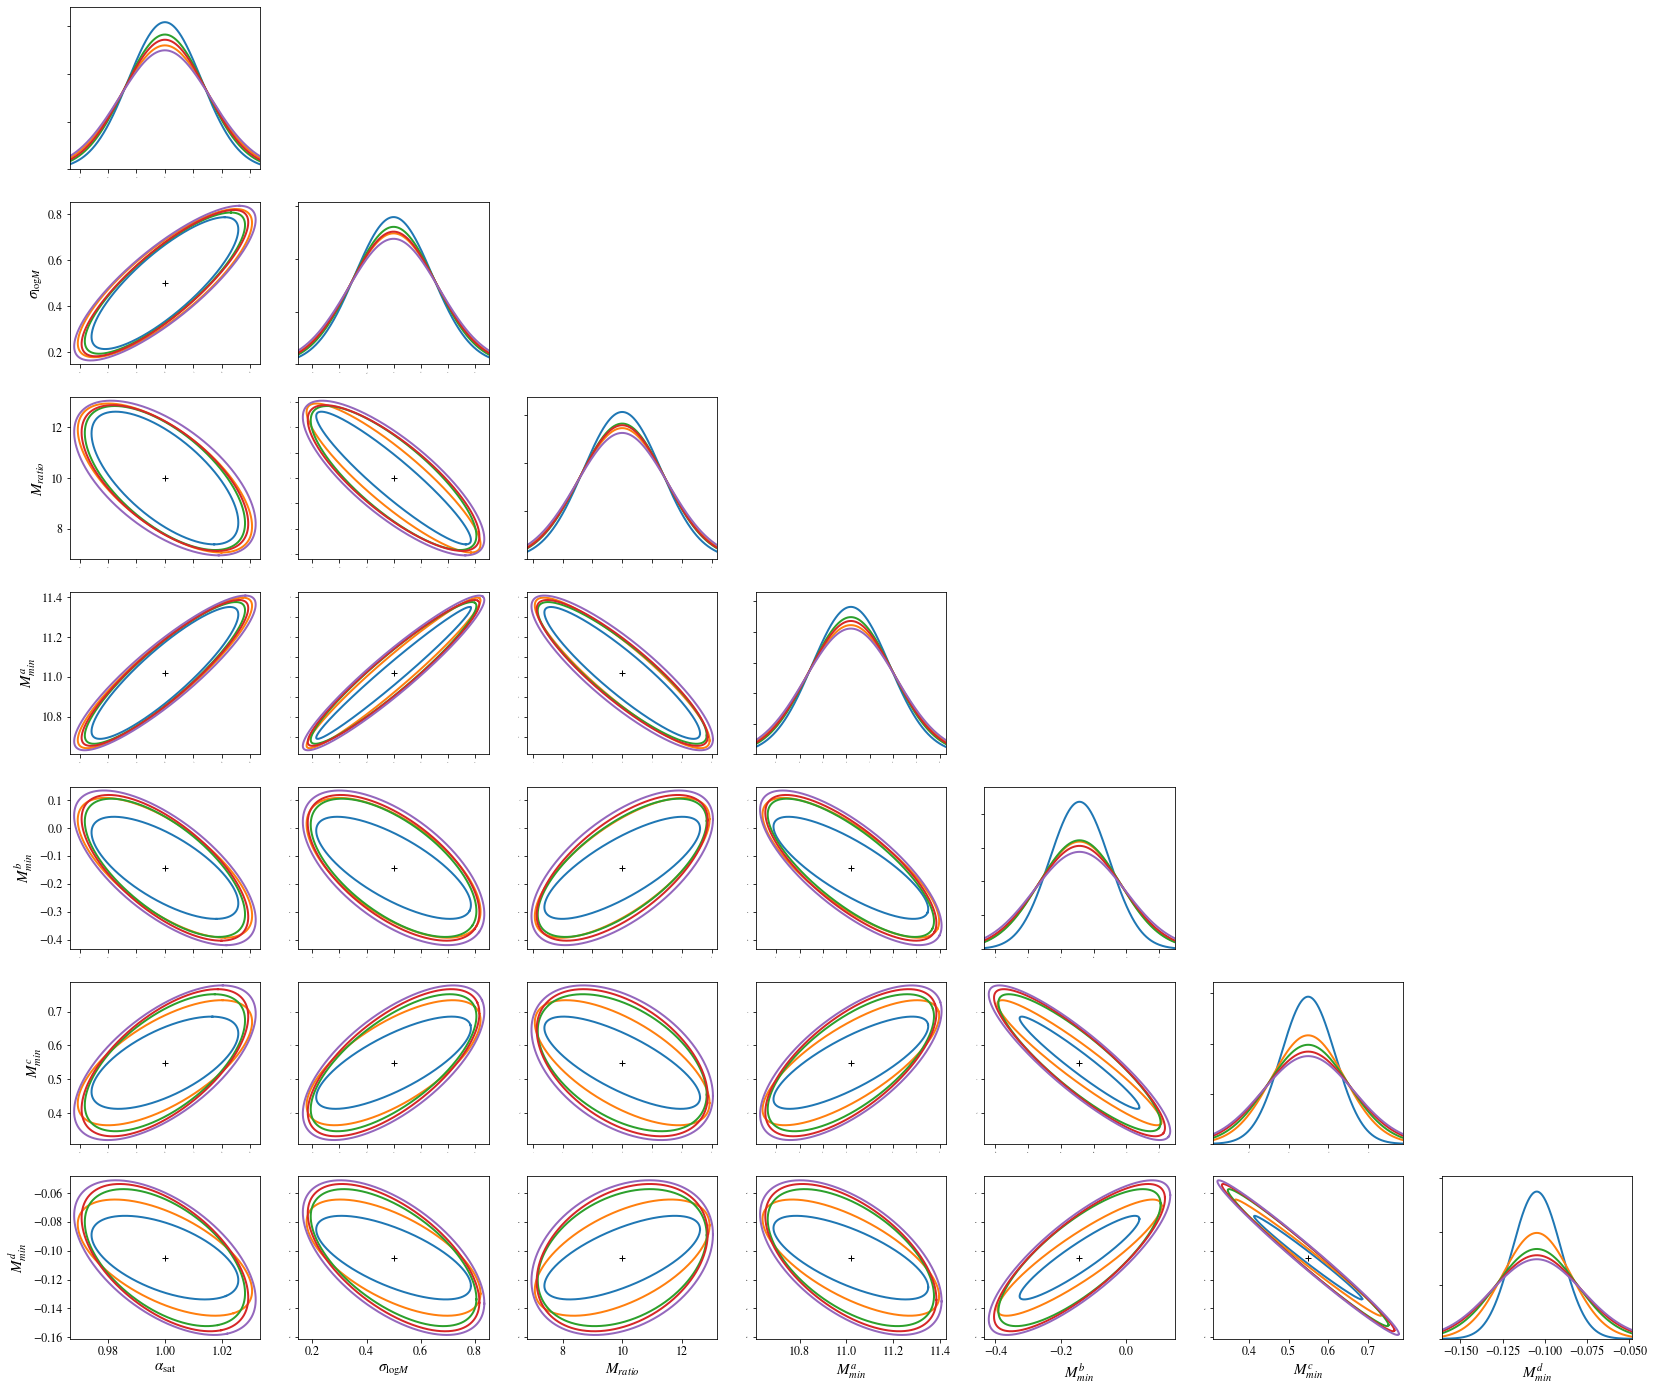

In [50]:
#Plot ellipses at il2000
Fisher_dico = {0:Fisher_G_allz_HOD_cosmomarged[:,:,il2000]*sqfsky_Euclid,1:Fisher_wONG_allz_HOD_cosmomarged[:,:,il2000]*sqfsky_Euclid,2:Fisher_wSSC_allz_HOD_cosmomarged[:,:,il2000]*sqfsky_Euclid,3:Fisher_wS1h_allz_HOD_cosmomarged[:,:,il2000]*sqfsky_Euclid,4:Fisher_tot_allz_HOD_cosmomarged[:,:,il2000]*sqfsky_Euclid}
colors=[t10_cmap(0),t10_cmap(1),t10_cmap(2),t10_cmap(3),t10_cmap(4)]
FisherPlot.oplot_FisherMatrix(param_values[ipminhod:(ipmaxhod+1)],Fisher_dico,latex_param_names[ipminhod:(ipmaxhod+1)],colors=colors)

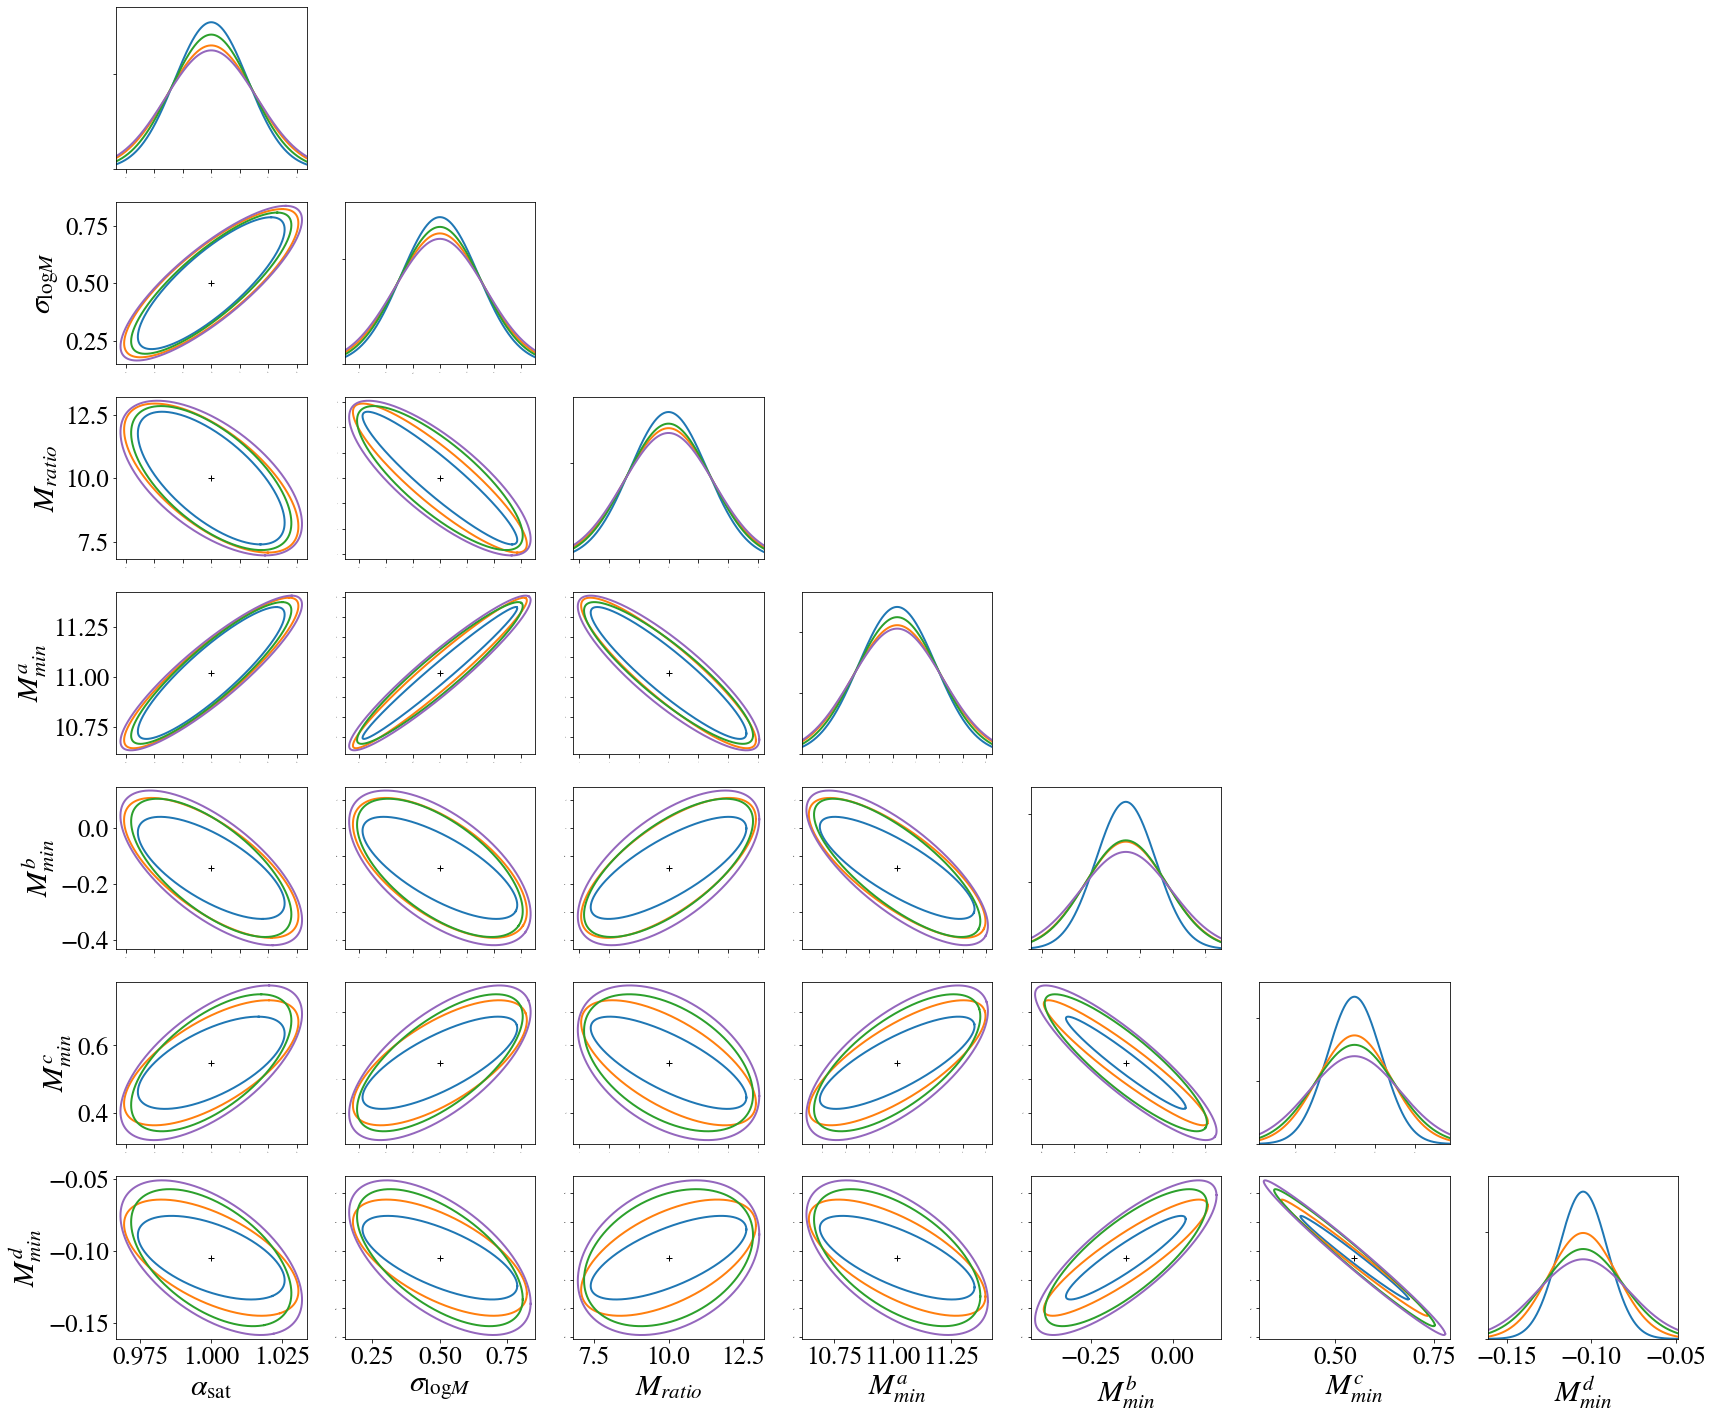

In [51]:
#Same but without S1h
Fisher_dico = {0:Fisher_G_allz_HOD_cosmomarged[:,:,il2000]*sqfsky_Euclid,1:Fisher_wONG_allz_HOD_cosmomarged[:,:,il2000]*sqfsky_Euclid,2:Fisher_wSSC_allz_HOD_cosmomarged[:,:,il2000]*sqfsky_Euclid,3:Fisher_tot_allz_HOD_cosmomarged[:,:,il2000]*sqfsky_Euclid}
colors=[t10_cmap(0),t10_cmap(1),t10_cmap(2),t10_cmap(4)]
FisherPlot.oplot_FisherMatrix(param_values[ipminhod:(ipmaxhod+1)],Fisher_dico,latex_param_names[ipminhod:(ipmaxhod+1)],colors=colors,fontsize=30,labelsize=25)
plt.savefig(plotprefix+"_ellipses-HOD-Clgal.png",bbox_inches='tight')

In [52]:
#Print some condition numbers, to see whether matrices are more or less degenerate
print("{:4.2e}".format(np.linalg.cond(Fisher_G_allz_HOD_cosmomarged[:,:,il2000])))
print("{:4.2e}".format(np.linalg.cond(Fisher_wONG_allz_HOD_cosmomarged[:,:,il2000])))
print("{:4.2e}".format(np.linalg.cond(Fisher_wSSC_allz_HOD_cosmomarged[:,:,il2000])))
print("{:4.2e}".format(np.linalg.cond(Fisher_tot_allz_HOD_cosmomarged[:,:,il2000])))

5.61e+07
5.56e+07
3.92e+07
3.89e+07


<h4>Study condition numbers</h4>

In [53]:
#Recap of condition numbers, directly of Fisher matrices
print("G, wONG, wSSC, tot")
print("Whole matrix:")
print("{:4.2e}".format(np.linalg.cond(Fisher_G_allz[:,:,il2000])), \
      "{:4.2e}".format(np.linalg.cond(Fisher_wONG_allz[:,:,il2000])), \
      "{:4.2e}".format(np.linalg.cond(Fisher_wSSC_allz[:,:,il2000])), \
      "{:4.2e}".format(np.linalg.cond(Fisher_tot_allz[:,:,il2000])))

print("")
print("cosmo HODmarged:")
print("{:4.2e}".format(np.linalg.cond(Fisher_G_allz_cosmo_HODmarged[:,:,il2000])), \
      "{:4.2e}".format(np.linalg.cond(Fisher_wONG_allz_cosmo_HODmarged[:,:,il2000])), \
      "{:4.2e}".format(np.linalg.cond(Fisher_wSSC_allz_cosmo_HODmarged[:,:,il2000])), \
      "{:4.2e}".format(np.linalg.cond(Fisher_tot_allz_cosmo_HODmarged[:,:,il2000])))

print("")
print("HOD cosmomarged:")
print("{:4.2e}".format(np.linalg.cond(Fisher_G_allz_HOD_cosmomarged[:,:,il2000])), \
      "{:4.2e}".format(np.linalg.cond(Fisher_wONG_allz_HOD_cosmomarged[:,:,il2000])), \
      "{:4.2e}".format(np.linalg.cond(Fisher_wSSC_allz_HOD_cosmomarged[:,:,il2000])), \
      "{:4.2e}".format(np.linalg.cond(Fisher_tot_allz_HOD_cosmomarged[:,:,il2000])))

G, wONG, wSSC, tot
Whole matrix:
1.03e+09 9.20e+08 6.14e+08 6.48e+08

cosmo HODmarged:
4.77e+07 8.66e+07 1.29e+08 1.38e+08

HOD cosmomarged:
5.61e+07 5.56e+07 3.92e+07 3.89e+07


In [54]:
#Same but for Fisher correlation matrices Fij/sqrt(Fii*Fjj)
print("G, wONG, wSSC, tot")
print("Whole matrix:") 
print("{:4.2e}".format(np.linalg.cond(tooFab.NormalizeMatrix(Fisher_G_allz[:,:,il2000]))), \
      "{:4.2e}".format(np.linalg.cond(tooFab.NormalizeMatrix(Fisher_wONG_allz[:,:,il2000]))), \
      "{:4.2e}".format(np.linalg.cond(tooFab.NormalizeMatrix(Fisher_wSSC_allz[:,:,il2000]))), \
      "{:4.2e}".format(np.linalg.cond(tooFab.NormalizeMatrix(Fisher_tot_allz[:,:,il2000]))))

print("")
print("cosmo HODmarged:")
print("{:4.2e}".format(np.linalg.cond(tooFab.NormalizeMatrix(Fisher_G_allz_cosmo_HODmarged[:,:,il2000]))), \
      "{:4.2e}".format(np.linalg.cond(tooFab.NormalizeMatrix(Fisher_wONG_allz_cosmo_HODmarged[:,:,il2000]))), \
      "{:4.2e}".format(np.linalg.cond(tooFab.NormalizeMatrix(Fisher_wSSC_allz_cosmo_HODmarged[:,:,il2000]))), \
      "{:4.2e}".format(np.linalg.cond(tooFab.NormalizeMatrix(Fisher_tot_allz_cosmo_HODmarged[:,:,il2000]))))

print("")
print("HOD cosmomarged:")
print("{:4.2e}".format(np.linalg.cond(tooFab.NormalizeMatrix(Fisher_G_allz_HOD_cosmomarged[:,:,il2000]))), \
      "{:4.2e}".format(np.linalg.cond(tooFab.NormalizeMatrix(Fisher_wONG_allz_HOD_cosmomarged[:,:,il2000]))), \
      "{:4.2e}".format(np.linalg.cond(tooFab.NormalizeMatrix(Fisher_wSSC_allz_HOD_cosmomarged[:,:,il2000]))), \
      "{:4.2e}".format(np.linalg.cond(tooFab.NormalizeMatrix(Fisher_tot_allz_HOD_cosmomarged[:,:,il2000]))))

G, wONG, wSSC, tot
Whole matrix:
4.26e+06 2.74e+06 1.18e+06 1.32e+06

cosmo HODmarged:
1.34e+03 2.01e+03 3.00e+03 3.11e+03

HOD cosmomarged:
2.72e+05 3.72e+05 3.24e+05 3.53e+05
